##### Loss Curves

In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.2


In [10]:
from scipy.signal import savgol_filter

from typing import List
import os

# https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

# Uploaded using tensorboard dev upload --logdir tensorboard_8b7178b178boscar --name "tensorboard_8b7178b178boscar"
MODEL_TO_ID_8C4 = {
    "tensorboard_8b7178b4b": "3jETknDLRWeDxO0TDXOFZw",
    "tensorboard_8b7178b13b": "HaF19kmMSL2ce0w6tRx2wg",
    "tensorboard_8b7178b25b": "QZIbYQR0SX2ZMBztYNEC9A",
    "tensorboard_8b7178b35b": "nE2nk4p3TYGNgv0CzNZjtQ",
    "tensorboard_8b7178b44b": "orJQHPulQkK81DtjN2o3mA",
    "tensorboard_8b7178b58b": "BhJPvMhEQKe6g06qwFEv9A",
    "tensorboard_8b7178b88b": "je8DgcWeSrCWYxQveCGyoQ",
    "tensorboard_8b7178b178b": "PvKObUJwQeCAlZ9QUNPmYA",
}

MODEL_TO_ID_8OSCAR = {
    "tensorboard_8b7178b4boscar": "tEQJvE2MRA2FvQy8E6ACNQ",
    "tensorboard_8b7178b13boscar": "vPV3R60FQuqjo2AvkUM1Jw",
    "tensorboard_8b7178b25boscar": "8J3jYtdCQBWfYqBYBdeH6A",
    "tensorboard_8b7178b35boscar": "COB9LW80T6y7Uo3uqXswSw",
    "tensorboard_8b7178b44boscar": "5cKZYdrtRze3pZxYmQzOkg",
    "tensorboard_8b7178b58boscar": "oFgmb4EYTveq6gwurdELYA",
    "tensorboard_8b7178b88boscar": "S4yATqIpTmmBLeQwzXOMTw",
    #"tensorboard_8b7178b178boscar": "onhetwWrQ2arjiJzYmoqNA",  # Only up to 70K steps
    #"tensorboard_8b7178b178boscar_val": "YwW56JkoRWKIDIlfwMCb4g", # Different validation
    "tensorboard_8b7178b178boscar": "UD7KJYMWQBW1jeQv4dnFMg",
}


MODEL_TO_ID_4C4 = {
    "tensorboard_4b284b1b9c4": "GJQnxhRbTDqIAESlJlqnyQ",
    "tensorboard_4b284b6bc4": "Gpb9KXp8QxWoG04kuB3Q0Q",
    "tensorboard_4b284b12bc4": "6u4kKYhOQ42K6FjlW4Mzfw",
    "tensorboard_4b284b17bc4": "AV1DPG9DQ1ebQdhelka6rg",
    "tensorboard_4b284b21bc4": "koZ9lRPxTnGW2DdG7TpTrw",
    "tensorboard_4b284b28bc4": "IBK7bJaqRBKkAQ0OeKZYCg",
    "tensorboard_4b284b42bc4": "cXJZmYyeQdynLdmBaWYRnA",
    "tensorboard_4b284b84bc4": "dwcP4acZRYOWW3JNJJApeQ",
}

MODEL_TO_ID_4OSCAR = {
    "tensorboard_4b284b1b9oscar": "Duo6twajQAq2JDkzNIBK7g",
    "tensorboard_4b284b6boscar": "QWwPm1jrSrWu0LpQyGtYUw",
    "tensorboard_4b284b12boscar": "BQ3IatWoR6SqtJvJwnAF3w",
    "tensorboard_4b284b17boscar": "NJPrsDYsQHK1sESKXgwn0Q",
    "tensorboard_4b284b21boscar": "VAghAG1mTAq2GoNTr5SqOQ",
    "tensorboard_4b284b28boscar": "EYKl7llQSeuLnxF8CVu9RQ",
    "tensorboard_4b284b42boscar": "Lsq5kVwNQkCwXUl8PFAQIg",
    "tensorboard_4b284b84boscar": "3EJkoqmxQnmX1s0MuDHRTg",
}


MODEL_TO_ID_2C4 = {
    "tensorboard_2b855b1b25c4": "w7KmvQJRRvyCAsd0DkLOwg",
    "tensorboard_2b855b4bc4": "ZXJceKIQT0GOYcK27MaBBQ",
    "tensorboard_2b855b9bc4": "pbQN2jUDRYGwcytlHPhl3A",
    "tensorboard_2b855b11bc4": "FzZOyY97Qa6rvm93VYycaw",
    "tensorboard_2b855b14bc4": "bPH3G4sgQbqvVuzx8GezXw",
    "tensorboard_2b855b18bc4": "IgXi5yjpQXeXF8LGlK0Mag",
    "tensorboard_2b855b28bc4": "AwpTAhvRRKSJ9wI0eQO3dw",
    "tensorboard_2b855b55bc4": "Q6Lm5nBgRxeiKMHK6283Pw",
}

MODEL_TO_ID_2OSCAR = {
    "tensorboard_2b855b1b25oscar": "TRM2S5j1QEWSwcBP7Qfb2A",
    "tensorboard_2b855b4boscar": "1ZIDDurdS3O5FWJwNTmr7w",
    "tensorboard_2b855b9boscar": "k2qH7TvzQ3CRfr1hrD7exg",
    "tensorboard_2b855b11boscar": "M8lMcj3jSYmHn3Wba0kt0w",
    "tensorboard_2b855b14boscar": "gzBUNp8eQc2UEOmWVerBxQ",
    "tensorboard_2b855b18boscar": "wVxrmLoHRZaRRYer6Z1fQQ",
    "tensorboard_2b855b28boscar": "N0UpKqiBQyGa5yLH3Kw9sA",
    "tensorboard_2b855b55boscar": "gmv0q4gvTa6ANJmoC4dE2A",
}

#### Select validation or training loss ###
LOSS = "training"#"validation" # training

def get_data(model, model_id):
    # For the first time download & filter it into a csv; then upload the csc to save time
    experiment = tb.data.experimental.ExperimentFromDev(model_id)
    df = experiment.get_scalars()
    
    if ("oscar" in model) and (LOSS == "validation"):
        tokens = df[df["tag"] == f'lm-loss-{LOSS}/{LOSS}_oscar/lm loss {LOSS} vs tokens'].step.values
        losses = df[df["tag"] == f'lm-loss-{LOSS}/{LOSS}_oscar/lm loss {LOSS} vs tokens'].value.values
    elif LOSS == "training":
        tokens = df[df["tag"] == f'lm-loss-{LOSS}/lm loss vs tokens'].step.values
        losses = df[df["tag"] == f'lm-loss-{LOSS}/lm loss vs tokens'].value.values        
    else:
        tokens = df[df["tag"] == f'lm-loss-{LOSS}/{LOSS}/lm loss {LOSS} vs tokens'].step.values
        losses = df[df["tag"] == f'lm-loss-{LOSS}/{LOSS}/lm loss {LOSS} vs tokens'].value.values
    
    path = f"{model}.csv" if LOSS == 'validation' else f"{model}_{LOSS}.csv"

    if ("oscar" in model) and (LOSS == "validation"):
        df[df["tag"] == f'lm-loss-{LOSS}/{LOSS}_oscar/lm loss {LOSS} vs tokens'].to_csv(path)
    elif LOSS == "training":
        df[df["tag"] == f'lm-loss-{LOSS}/lm loss vs tokens'].to_csv(path)
    else:
        df[df["tag"] == f'lm-loss-{LOSS}/{LOSS}/lm loss {LOSS} vs tokens'].to_csv(path)
    
    return tokens, losses

def get_data_csv(model, model_id, smooth_data=False):
    if LOSS == "training":
        if not(os.path.exists(f"{model}_{LOSS}.csv")):
            !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tb{LOSS}/{model}_{LOSS}.csv
    else:
        if not(os.path.exists(f"{model}.csv")):
            !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tb{LOSS}/{model}.csv
    path = f"{model}.csv" if LOSS == 'validation' else f"{model}_{LOSS}.csv"
    df = pd.read_csv(path, index_col=0)
    if LOSS == "training":
        df['value'] = smooth(df["value"].values.tolist(), weight=0.999)
    elif smooth_data:
        df[["value"]] = df[["value"]].apply(savgol_filter,  window_length=3, polyorder=2)
        df['value'] = smooth(df["value"].values.tolist(), weight=0.85)
    return df.step.values, df.value.values

#"""
if False:
    data_2c4 = []
    for model, model_id in MODEL_TO_ID_2C4.items():
        data_2c4.append(get_data(model, model_id))
else:
    data_2c4 = []
    for model, model_id in MODEL_TO_ID_2C4.items():
        data_2c4.append(get_data_csv(model, model_id))
if False:
    data_2oscar = []
    for model, model_id in MODEL_TO_ID_2OSCAR.items():
        data_2oscar.append(get_data(model, model_id))
else:
    data_2oscar = []
    for model, model_id in MODEL_TO_ID_2OSCAR.items():
        data_2oscar.append(get_data_csv(model, model_id))

if False:
    data_4c4 = []
    for model, model_id in MODEL_TO_ID_4C4.items():
        data_4c4.append(get_data(model, model_id))
else:
    data_4c4 = []
    for model, model_id in MODEL_TO_ID_4C4.items():
        data_4c4.append(get_data_csv(model, model_id))

if False:
    data_4oscar = []
    for model, model_id in MODEL_TO_ID_4OSCAR.items():
        data_4oscar.append(get_data(model, model_id))
else:
    data_4oscar = []
    for model, model_id in MODEL_TO_ID_4OSCAR.items():

        data_4oscar.append(get_data_csv(model, model_id))
#"""
if False:
    data_8c4 = []
    for model, model_id in MODEL_TO_ID_8C4.items():
        data_8c4.append(get_data(model, model_id))
else:
    data_8c4 = []
    for model, model_id in MODEL_TO_ID_8C4.items():
        data_8c4.append(get_data_csv(model, model_id, smooth_data=True))

if False:
    data_8oscar = []
    for model, model_id in MODEL_TO_ID_8OSCAR.items():
        data_8oscar.append(get_data(model, model_id))
else:
    data_8oscar = []
    for model, model_id in MODEL_TO_ID_8OSCAR.items():
        data_8oscar.append(get_data_csv(model, model_id, smooth_data=True))




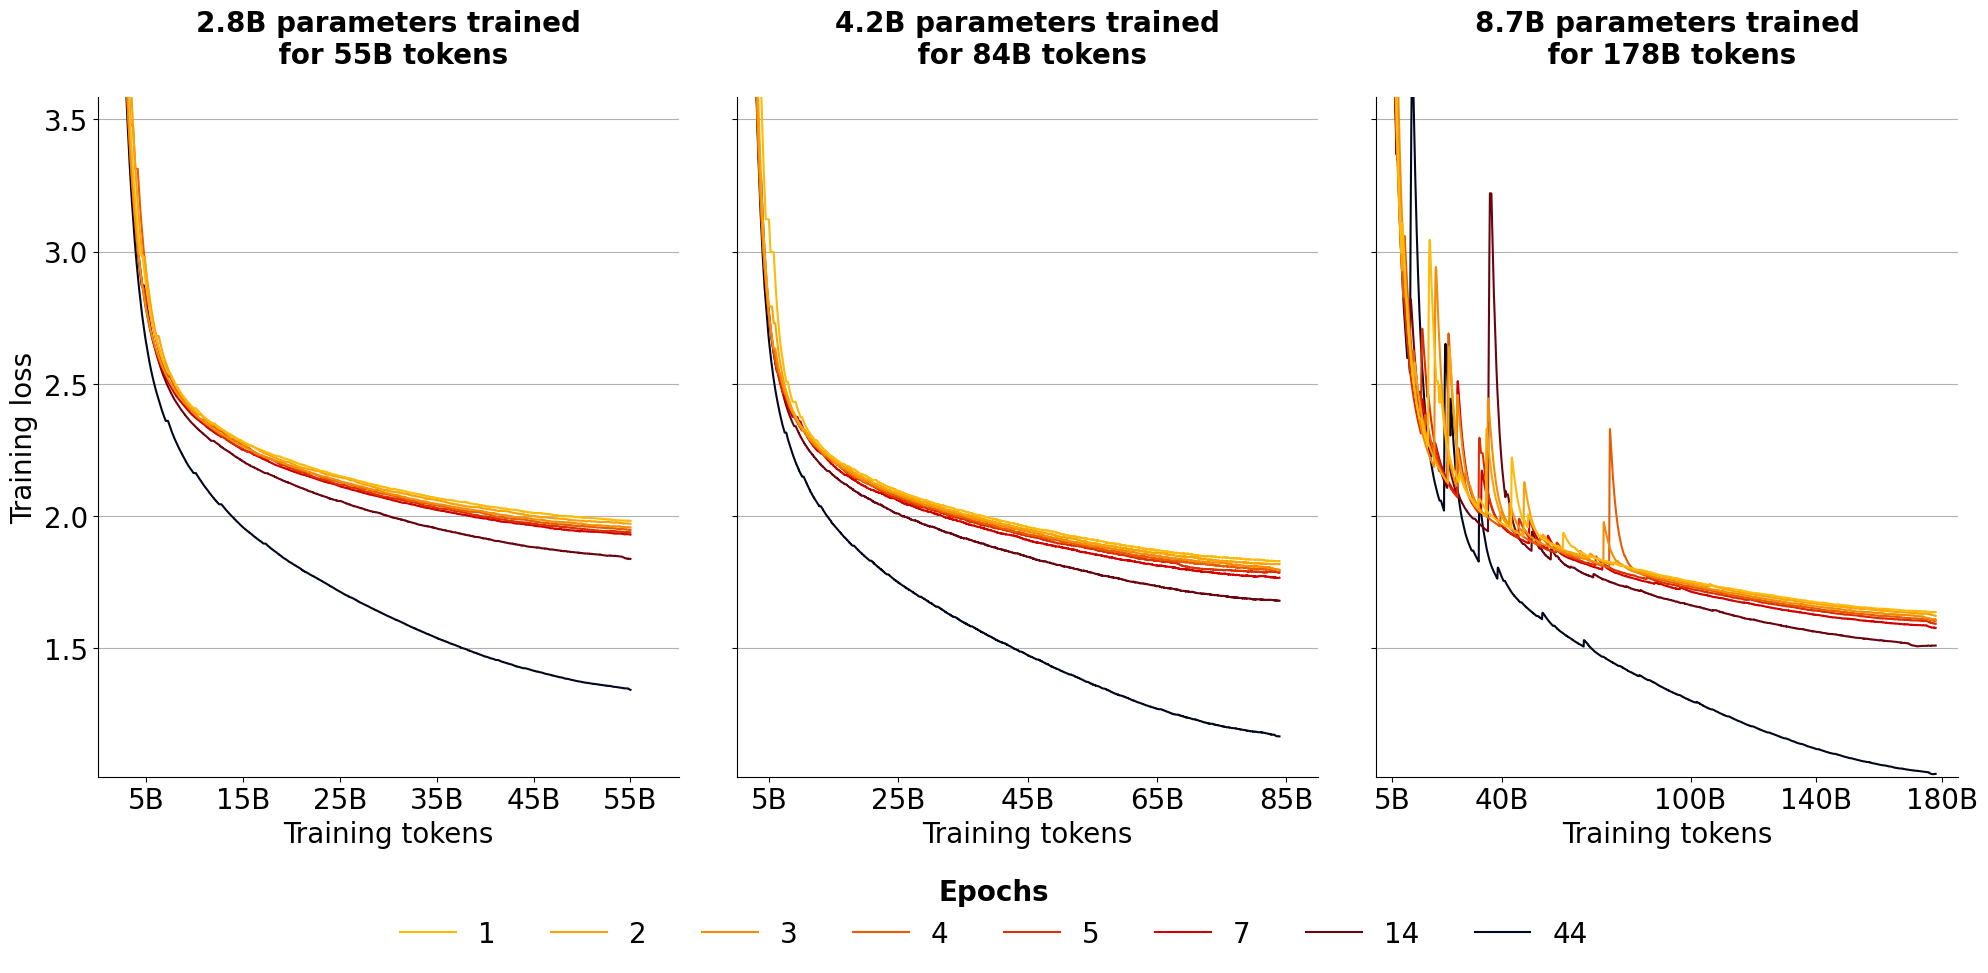

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


PREFIX_TO_EPOCHS = {
    "8b7178b4b": 44,
    "8b7178b13b": 14,
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b1b9": 44,
    "4b284b6b": 14,
    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}


TOKENS_TICKS_8 = [
    5e9,
    #1e9, 
    #20e9, 
    40e9,
    #60e9, 
    #80e9,
    100e9,
    #120e9,
    140e9,
    #160e9,
    180e9,           
]

TOKENS_STR_8 = [
    "5B",
    #"1B", 
    #"20B", 
    "40B", 
    #"60B",  
    #"80B",
    "100B",
    #"120B",  
    "140B",
    #"160B", 
    "180B",   
]

#TOKENS_TICKS_8 = [
#    44e9,
#    58e9,
#    88e9,
#    178e9, 
#]    
#TOKENS_STR_8 = [
#    "44B",
#    "58B",
#    "88B",
#    "178B",
#]

TOKENS_TICKS_4 = [
    #1e9,
    5e9,
    #10e9, 
    #20e9, 
    25e9,
    #30e9, 
    #40e9, 
    45e9,
    #50e9, 
    #60e9,
    65e9,
    #70e9, 
    #80e9,
    85e9,
    #90e9,
    #100e9
]

TOKENS_STR_4 = [
    #"1B", 
    "5B",
    #"10B", 
    #"20B", 
    "25B",
    #"30B", 
    #"40B", 
    "45B",
    #"50B", 
    #"60B", 
    "65B",
    #"70B", 
    #"80B",
    "85B",
    #"90B"
    #"100B",
]

TOKENS_TICKS_2 = [
    #0e9, 
    5e9,
    #10e9, 
    15e9,
    #20e9, 
    25e9,
    #30e9, 
    35e9,
    #40e9, 
    45e9,
    #50e9, 
    55e9,
    #60e9,
]

TOKENS_STR_2 = [
    #"1B",
    "5B",
    #"10B",
    "15B", 
    #"20B", 
    "25B",
    #"30B", 
    "35B",
    #"40B", 
    "45B",
    #"50B", 
    "55B",
    #"60B"
]


FONTSIZE = 20

fig, axes = plt.subplots(figsize=(24, 10), facecolor='w', nrows=1, ncols=3, edgecolor='k', sharey=True)

axes = axes.flatten()


### Select C4 / OSCAR ###
DATASET = "oscar"#"oscar" # oscar
if (LOSS == "training") and (DATASET == "oscar"):
    MAX_MULT = 3.5
else:
    MAX_MULT = 1.5

if DATASET == "c4":
    GROUPS = [
        (0, MODEL_TO_ID_2C4, data_2c4, TOKENS_TICKS_2, TOKENS_STR_2),
        (1, MODEL_TO_ID_4C4, data_4c4, TOKENS_TICKS_4, TOKENS_STR_4),
        (2, MODEL_TO_ID_8C4, data_8c4, TOKENS_TICKS_8, TOKENS_STR_8),
    ]
elif DATASET == "oscar":
    GROUPS = [
        (0, MODEL_TO_ID_2OSCAR, data_2oscar, TOKENS_TICKS_2, TOKENS_STR_2),
        (1, MODEL_TO_ID_4OSCAR, data_4oscar, TOKENS_TICKS_4, TOKENS_STR_4),
        (2, MODEL_TO_ID_8OSCAR, data_8oscar, TOKENS_TICKS_8, TOKENS_STR_8),
    ]

IDX_TO_TILE = {
    0: "2.8B parameters trained\n for 55B tokens",
    1: "4.2B parameters trained\n for 84B tokens",
    2: "8.7B parameters trained\n for 178B tokens",      
}

for (i, models, data, ticks, ticks_str) in GROUPS:
    for model, model_data in zip(models, data):
        tokens = model_data[0]
        losses = model_data[1]
        prefix = model.split("_")[1].replace("oscar", "").replace("c4", "")
        epochs = PREFIX_TO_EPOCHS[prefix]
        color = EPOCHS_TO_COLOR[epochs]
        #suffix = "epoch"
        axes[i].plot(tokens, losses, label=f"{epochs}", color=color, markersize=5)

    axes[i].grid(axis='y')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set_xticks(ticks, ticks_str, fontsize=FONTSIZE)
    axes[i].set_xlim((min(ticks) - 5e9, max(ticks) + 5e9))
    
    min_val = min(data, key=lambda x: x[1].min())[1].min()
    axes[i].set_ylim((min_val - min_val * 0.01, min_val * MAX_MULT))
    
    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    #if i > 2: 
    axes[i].set_xlabel("Training tokens", fontsize=FONTSIZE)
    if i == 0:
        axes[i].set_ylabel(f"{LOSS.capitalize()} loss", fontsize=FONTSIZE)
    if i == 3:
        axes[i].set_ylabel("OSCAR Validation loss", fontsize=FONTSIZE)

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE, fontweight="bold", pad=24)

handles, labels = axes[0].get_legend_handles_labels()

fig.legend(
    handles[::-1],
    labels[::-1],
    frameon=False,
    fontsize=FONTSIZE,
    #ncol=8,
    #loc=(0, 1.2),
    ncol=8,
    title="Epochs",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    loc="lower center",
)

plt.subplots_adjust(wspace=0.1, bottom=0.2)


plt.savefig(f'{LOSS}_{DATASET}.pdf', dpi=300, bbox_inches='tight')
plt.show()

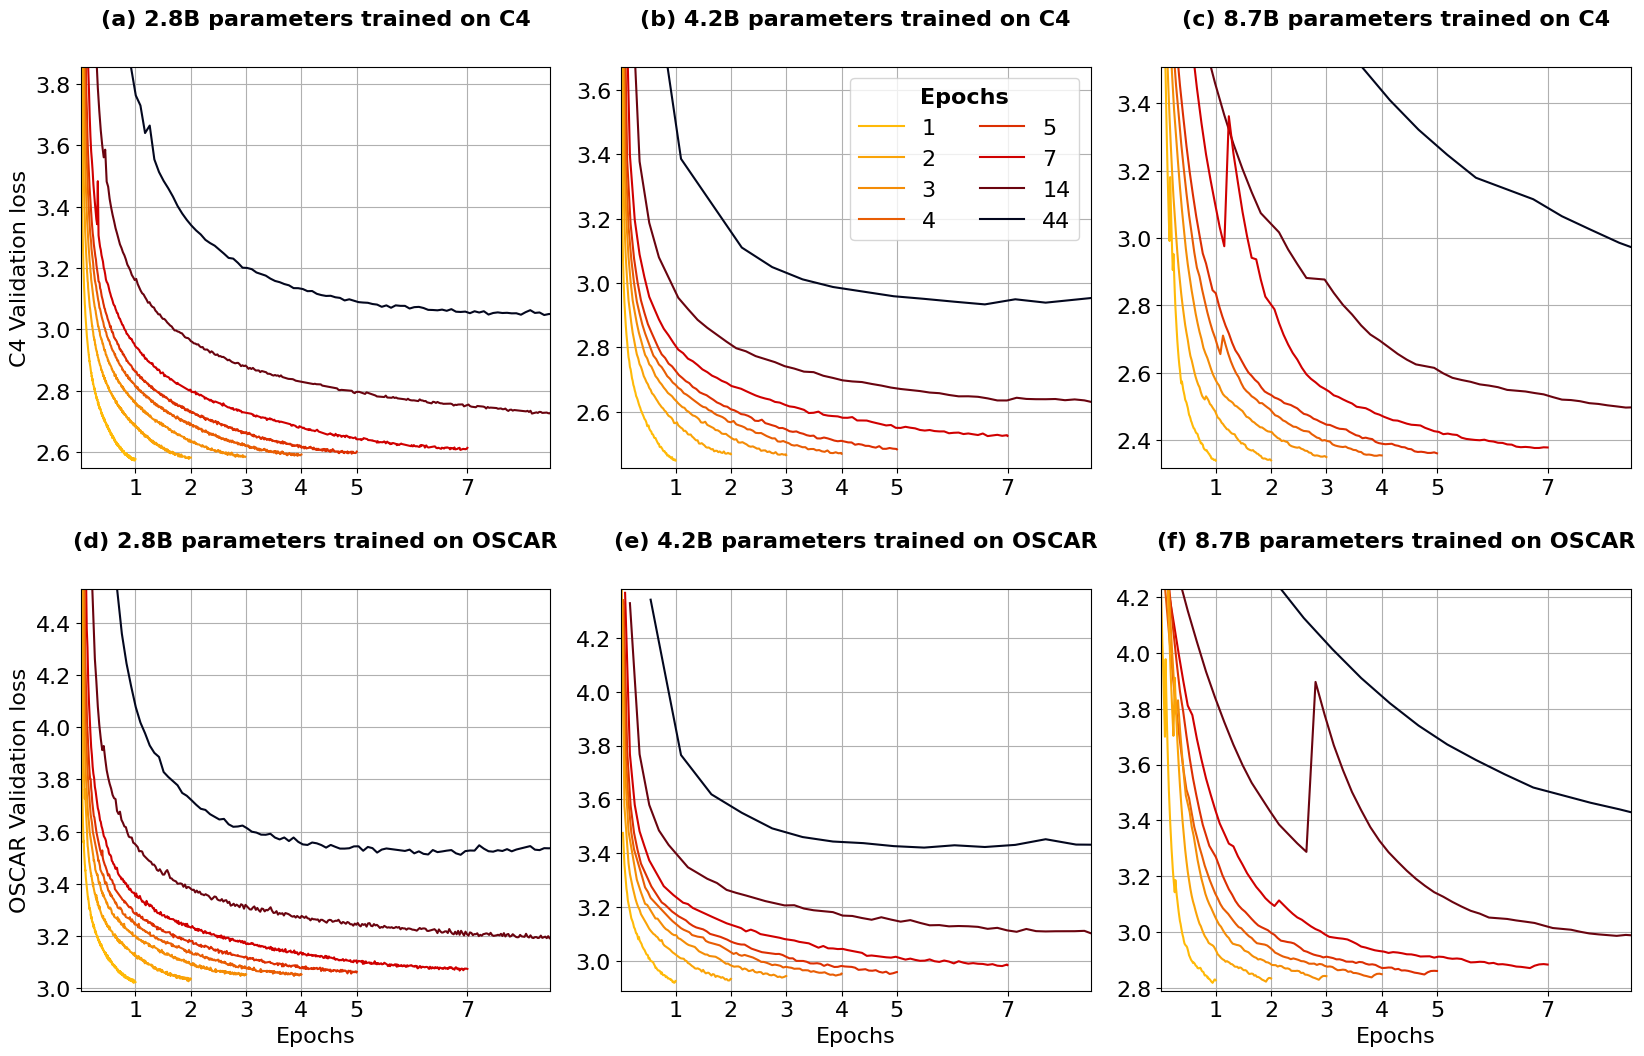

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


PREFIX_TO_EPOCHS = {
    "8b7178b4b": 44,
    "8b7178b13b": 14,
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b1b9": 44,
    "4b284b6b": 14,
    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}


TOKENS_TICKS_8 = [
    #1e9, 
    20e9, 
    #40e9,
    60e9, 
    #80e9,
    100e9,
    #120e9,
    140e9,
    #160e9,
    180e9,           
]

TOKENS_STR_8 = [
    #"1B", 
    "20B", 
    #"40B", 
    "60B",  
    #"80B",
    "100B",
    #"120B",  
    "140B",
    #"160B", 
    "180B",   
]

TOKENS_TICKS_4 = [
    #1e9,
    5e9,
    #10e9, 
    #20e9, 
    25e9,
    #30e9, 
    #40e9, 
    45e9,
    #50e9, 
    #60e9,
    65e9,
    #70e9, 
    #80e9,
    85e9,
    #90e9,
    #100e9
]

TOKENS_STR_4 = [
    #"1B", 
    "5B",
    #"10B", 
    #"20B", 
    "25B",
    #"30B", 
    #"40B", 
    "45B",
    #"50B", 
    #"60B", 
    "65B",
    #"70B", 
    #"80B",
    "85B",
    #"90B"
    #"100B",
]

TOKENS_TICKS_2 = [
    #0e9, 
    5e9,
    #10e9, 
    15e9,
    #20e9, 
    25e9,
    #30e9, 
    35e9,
    #40e9, 
    45e9,
    #50e9, 
    55e9,
    #60e9,
]

TOKENS_STR_2 = [
    #"1B",
    "5B",
    #"10B",
    "15B", 
    #"20B", 
    "25B",
    #"30B", 
    "35B",
    #"40B", 
    "45B",
    #"50B", 
    "55B",
    #"60B"
]


FONTSIZE = 16

fig, axes = plt.subplots(figsize=(20, 12), facecolor='w', nrows=2, ncols=3, edgecolor='k', sharey=False)

plt.subplots_adjust(wspace=0.15, hspace=0.3)

axes = axes.flatten()

GROUPS = [
    (0, MODEL_TO_ID_2C4, data_2c4, TOKENS_TICKS_2, TOKENS_STR_2, 55e9),
    (3, MODEL_TO_ID_2OSCAR, data_2oscar, TOKENS_TICKS_2, TOKENS_STR_2, 55e9),

    (1, MODEL_TO_ID_4C4, data_4c4, TOKENS_TICKS_4, TOKENS_STR_4, 84e9),
    (4, MODEL_TO_ID_4OSCAR, data_4oscar, TOKENS_TICKS_4, TOKENS_STR_4, 84e9),

    (2, MODEL_TO_ID_8C4, data_8c4, TOKENS_TICKS_8, TOKENS_STR_8, 178e9),
    (5, MODEL_TO_ID_8OSCAR, data_8oscar, TOKENS_TICKS_8, TOKENS_STR_8, 178e9),
]

IDX_TO_TILE = {
    0: "(a) 2.8B parameters trained on C4",
    1: "(b) 4.2B parameters trained on C4",
    2: "(c) 8.7B parameters trained on C4",
    3: "(d) 2.8B parameters trained on OSCAR",
    4: "(e) 4.2B parameters trained on OSCAR",
    5: "(f) 8.7B parameters trained on OSCAR",       
}

for (i, models, data, ticks, ticks_str, total_tokens) in GROUPS:
    for model, model_data in zip(models, data):
        tokens = model_data[0]
        losses = model_data[1]
        prefix = model.split("_")[1].replace("oscar", "").replace("c4", "")
        epochs = PREFIX_TO_EPOCHS[prefix]
        color = EPOCHS_TO_COLOR[epochs]

        epochs_array = [toks / (total_tokens / epochs) for toks in tokens]
        axes[i].plot(epochs_array, losses, label=f"{epochs}", color=color, markersize=5)


    axes[i].grid(axis='y')
    axes[i].grid(axis='x')

    #axes[i].spines['right'].set_visible(False)
    #axes[i].spines['top'].set_visible(False)
    #axes[i].set_xticks(ticks, ticks_str, fontsize=FONTSIZE)
    #axes[i].set_xlim((min(ticks) - 5e9, max(ticks) + 5e9))
    
    min_val = min(data, key=lambda x: x[1].min())[1].min()
    axes[i].set_ylim((min_val - min_val * 0.01, min_val * 1.5))
    
    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    axes[i].set_xticks(list(EPOCHS_TO_COLOR.keys())[2:], list(EPOCHS_TO_COLOR.keys())[2:], fontsize=FONTSIZE)
    axes[i].set_xlim((0.01, list(EPOCHS_TO_COLOR.keys())[2] + 1.5 ))

    if i > 2: 
        axes[i].set_xlabel("Epochs", fontsize=FONTSIZE)
    if i == 0:
        axes[i].set_ylabel("C4 Validation loss", fontsize=FONTSIZE)
    if i == 3:
        axes[i].set_ylabel("OSCAR Validation loss", fontsize=FONTSIZE)

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE, fontweight="bold", pad=30)


handles, labels = axes[0].get_legend_handles_labels()

axes[1].legend(
    handles[::-1],
    labels[::-1],
    #frameon=False,
    fontsize=FONTSIZE,
    #ncol=8,
    #loc=(0, 1.2),
    ncol=2,
    title="Epochs",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},   
)

#axes[1].legend(
#    *axes[0].get_legend_handles_labels(),
#    frameon=False,
#    fontsize=FONTSIZE,
#)

plt.savefig('validation_epochs_c4oscar.pdf', dpi=300, bbox_inches='tight')
plt.show()




## Old

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


PREFIX_TO_EPOCHS = {
    "8b7178b4b": 44,
    "8b7178b13b": 14,    
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b1b9": 44,
    "4b284b6b": 14,
    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}


TOKENS_TICKS_8 = [
    #1e9, 
    20e9, 
    #40e9,
    60e9, 
    #80e9,
    100e9,
    #120e9,
    140e9,
    #160e9,
    180e9,           
]

TOKENS_STR_8 = [
    #"1B", 
    "20B", 
    #"40B", 
    "60B",  
    #"80B",
    "100B",
    #"120B",  
    "140B",
    #"160B", 
    "180B",   
]

#TOKENS_TICKS_8 = [
#    44e9,
#    58e9,
#    88e9,
#    178e9, 
#]    
#TOKENS_STR_8 = [
#    "44B",
#    "58B",
#    "88B",
#    "178B",
#]

TOKENS_TICKS_4 = [
    #1e9,
    5e9,
    #10e9, 
    #20e9, 
    25e9,
    #30e9, 
    #40e9, 
    45e9,
    #50e9, 
    #60e9,
    65e9,
    #70e9, 
    #80e9,
    85e9,
    #90e9,
    #100e9
]

TOKENS_STR_4 = [
    #"1B", 
    "5B",
    #"10B", 
    #"20B", 
    "25B",
    #"30B", 
    #"40B", 
    "45B",
    #"50B", 
    #"60B", 
    "65B",
    #"70B", 
    #"80B",
    "85B",
    #"90B"
    #"100B",
]

TOKENS_TICKS_2 = [
    #0e9, 
    5e9,
    #10e9, 
    15e9,
    #20e9, 
    25e9,
    #30e9, 
    35e9,
    #40e9, 
    45e9,
    #50e9, 
    55e9,
    #60e9,
]

TOKENS_STR_2 = [
    #"1B",
    "5B",
    #"10B",
    "15B", 
    #"20B", 
    "25B",
    #"30B", 
    "35B",
    #"40B", 
    "45B",
    #"50B", 
    "55B",
    #"60B"
]


FONTSIZE = 16

fig, axes = plt.subplots(figsize=(20, 12), facecolor='w', nrows=2, ncols=3, edgecolor='k', sharey=False)

plt.subplots_adjust(wspace=0.15, hspace=0.3)

axes = axes.flatten()

GROUPS = [
    (0, MODEL_TO_ID_2C4, data_2c4, TOKENS_TICKS_2, TOKENS_STR_2),
    (3, MODEL_TO_ID_2OSCAR, data_2oscar, TOKENS_TICKS_2, TOKENS_STR_2),

    (1, MODEL_TO_ID_4C4, data_4c4, TOKENS_TICKS_4, TOKENS_STR_4),
    (4, MODEL_TO_ID_4OSCAR, data_4oscar, TOKENS_TICKS_4, TOKENS_STR_4),

    (2, MODEL_TO_ID_8C4, data_8c4, TOKENS_TICKS_8, TOKENS_STR_8),
    (5, MODEL_TO_ID_8OSCAR, data_8oscar, TOKENS_TICKS_8, TOKENS_STR_8),
]

IDX_TO_TILE = {
    0: "(a) 2.8B parameters trained on C4",
    1: "(b) 4.2B parameters trained on C4",
    2: "(c) 8.6B parameters trained on C4",
    3: "(d) 2.8B parameters trained on OSCAR",
    4: "(e) 4.2B parameters trained on OSCAR",
    5: "(f) 8.6B parameters trained on OSCAR",       
}

for (i, models, data, ticks, ticks_str) in GROUPS:
    for model, model_data in zip(models, data):
        tokens = model_data[0]
        losses = model_data[1]
        prefix = model.split("_")[1].replace("oscar", "").replace("c4", "")
        epochs = PREFIX_TO_EPOCHS[prefix]
        color = EPOCHS_TO_COLOR[epochs]
        #suffix = "epoch"
        axes[i].plot(tokens, losses, label=f"{epochs}", color=color, markersize=5)

    axes[i].grid(axis='y')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set_xticks(ticks, ticks_str, fontsize=FONTSIZE)
    axes[i].set_xlim((min(ticks) - 5e9, max(ticks) + 5e9))
    
    min_val = min(data, key=lambda x: x[1].min())[1].min()
    #max_val = max(data, key=lambda x: x[1].max())[1].max()
    #axes[i].set_ylim((min_val - min_val * 0.01, max_val - max_val * 0.3))
    axes[i].set_ylim((min_val - min_val * 0.01, min_val * 1.2))
    
    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    if i > 2: 
        axes[i].set_xlabel("Training tokens", fontsize=FONTSIZE)
    if i == 0:
        axes[i].set_ylabel("C4 Validation loss", fontsize=FONTSIZE)
    if i == 3:
        axes[i].set_ylabel("OSCAR Validation loss", fontsize=FONTSIZE)

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE, fontweight="bold", pad=30)

handles, labels = axes[0].get_legend_handles_labels()

axes[0].legend(
    handles[::-1],
    labels[::-1],
    #frameon=False,
    fontsize=FONTSIZE,
    #ncol=8,
    #loc=(0, 1.2),
    ncol=2,
    title="Epochs",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},   
)

plt.savefig('validation_c4oscar.pdf', dpi=300, bbox_inches='tight')
plt.show()



###### Individual plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', ncols=2, edgecolor='k', sharey=True)

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
COLOR_MAP = {
    "tensorboard_8b7178b25b": '#03071E',
    "tensorboard_8b7178b35b": '#6A040F',
    "tensorboard_8b7178b44b": '#D00000',
    "tensorboard_8b7178b58b": '#E85D04',
    "tensorboard_8b7178b88b": '#FB8500',
    #"tensorboard_4b284b84bc4": '#FFBA08',
}

EPOCHS = [7, 5, 4, 3, 2, 1]
TOTAL_TOKENS = 178e9

TOKENS_TICKS = [
    1e9, 
    #10e9, 
    20e9, 
    #30e9, 
    40e9, 
    #50e9, 
    60e9, 
    #70e9, 
    80e9, 
    #90e9, 
    100e9, 
    #110e9, 
    120e9,
    140e9,
    160e9,
    180e9,           
]

TOKENS_STR = [
    "1B", 
    #"10B", 
    "20B", 
    #"30B", 
    "40B", 
    #"50B", 
    "60B", 
    #"70B", 
    "80B",
    #"90B",
    "100B",
    #"110B",
    "120B",  
    "140B",
    "160B", 
    "180B",          
]

data = data_8c4.copy()

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    losses = data[i][1]
    axes[0].plot(tokens, losses, label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    epochs = [toks / (TOTAL_TOKENS / EPOCHS[i]) for toks in tokens]
    losses = data[i][1]
    axes[1].plot(epochs, list(losses), label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

axes[1].legend(
    frameon=False,
    #loc=(0.10, 1.15),
    fontsize=20,
)

axes[0].set_xlabel("Training tokens", fontsize=16)
axes[0].set_ylabel("Validation loss", fontsize=16)

#axes[0].set_xscale('log')

axes[0].set_xticks(TOKENS_TICKS, TOKENS_STR, fontsize=12)

#axes[0].set_yticks([2.4, 2.6, 2.8, 3.0, 3.2], fontsize=12)
#axes[1].set_xticks(list(range(8)), fontsize=12)

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

min_val = min(data, key=lambda x: x[1].min())[1].min()
max_val = max(data, key=lambda x: x[1].max())[1].max()

axes[0].set_ylim((min_val - min_val * 0.01, max_val - max_val * 0.15))
axes[1].set_xlabel("Epochs", fontsize=16)

axes[0].grid(axis='y')
axes[1].grid(axis='y')


axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.savefig('validation_8b7c4.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', ncols=2, edgecolor='k', sharey=True)

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
COLOR_MAP = {
    "tensorboard_4b284b12bc4": '#03071E',
    "tensorboard_4b284b17bc4": '#6A040F',
    "tensorboard_4b284b21bc4": '#D00000',
    "tensorboard_4b284b28bc4": '#E85D04',
    "tensorboard_4b284b42bc4": '#FB8500',
    "tensorboard_4b284b84bc4": '#FFBA08',
}

EPOCHS = [7, 5, 4, 3, 2, 1]
TOTAL_TOKENS = 84e9

TOKENS_TICKS = [12e9, 17e9, 21e9, 28e9, 42e9, 84e9]
TOKENS_STR = ["12B", "17B", "21B", "28B", "42B", "84B"]

TOKENS_TICKS = [1e9, 10e9, 20e9, 30e9, 40e9, 50e9, 60e9, 70e9, 80e9, 90e9]
TOKENS_STR = ["1B", "10B", "20B", "30B", "40B", "50B", "60B", "70B", "80B", "90B"]

data = data_4c4.copy()

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    losses = data[i][1]
    axes[0].plot(tokens, losses, label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    epochs = [toks / (TOTAL_TOKENS / EPOCHS[i]) for toks in tokens]
    losses = data[i][1]
    axes[1].plot(epochs, list(losses), label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

axes[1].legend(
    frameon=False,
    #loc=(0.10, 1.15),
    fontsize=20,
)

axes[0].set_xlabel("Training tokens", fontsize=16)
axes[0].set_ylabel("Validation loss", fontsize=16)

#axes[0].set_xscale('log')

axes[0].set_xticks(TOKENS_TICKS, TOKENS_STR, fontsize=12)

#axes[0].set_yticks([2.4, 2.6, 2.8, 3.0, 3.2], fontsize=12)
#axes[1].set_xticks(list(range(8)), fontsize=12)

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)


min_val = min(data, key=lambda x: x[1].min())[1].min()
max_val = max(data, key=lambda x: x[1].max())[1].max()

axes[0].set_ylim((min_val - min_val * 0.01, max_val - max_val * 0.25))
axes[1].set_xlabel("Epochs", fontsize=16)

axes[0].grid(axis='y')
axes[1].grid(axis='y')


axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.savefig('validation_4b2c4.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', ncols=2, edgecolor='k', sharey=True)

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
COLOR_MAP = {
    "tensorboard_4b284b12boscar": '#03071E',
    "tensorboard_4b284b17boscar": '#6A040F',
    "tensorboard_4b284b21boscar": '#D00000',
    "tensorboard_4b284b28boscar": '#E85D04',
    "tensorboard_4b284b42boscar": '#FB8500',
    "tensorboard_4b284b84boscar": '#FFBA08',
}

EPOCHS = [7, 5, 4, 3, 2, 1]
TOTAL_TOKENS = 84e9

TOKENS_TICKS = [1e9, 10e9, 20e9, 30e9, 40e9, 50e9, 60e9, 70e9, 80e9, 90e9]
TOKENS_STR = ["1B", "10B", "20B", "30B", "40B", "50B", "60B", "70B", "80B", "90B"]


data = data_4oscar.copy()

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    losses = data[i][1]
    axes[0].plot(tokens, losses, label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    epochs = [toks / (TOTAL_TOKENS / EPOCHS[i]) for toks in tokens]
    losses = data[i][1]
    axes[1].plot(epochs, list(losses), label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

axes[1].legend(
    frameon=False,
    #loc=(0.10, 1.15),
    fontsize=20,
)

axes[0].set_xlabel("Training tokens", fontsize=16)
axes[0].set_ylabel("Validation loss", fontsize=16)

#axes[0].set_xscale('log')

axes[0].set_xticks(TOKENS_TICKS, TOKENS_STR, fontsize=12)

#axes[0].set_yticks([2.4, 2.6, 2.8, 3.0, 3.2], fontsize=12)
#axes[1].set_xticks(list(range(8)), fontsize=12)

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)


min_val = min(data, key=lambda x: x[1].min())[1].min()
max_val = max(data, key=lambda x: x[1].max())[1].max()

axes[0].set_ylim((min_val - min_val * 0.01, max_val - max_val * 0.25))
axes[1].set_xlabel("Epochs", fontsize=16)

axes[0].grid(axis='y')
axes[1].grid(axis='y')


axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.savefig('validation_4b2oscar.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', ncols=2, edgecolor='k', sharey=True)

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
COLOR_MAP = {
    "tensorboard_2b855b1b25c4": '#03071E',
    "tensorboard_2b855b4bc4": '#370617',
    "tensorboard_2b855b9bc4": '#6A040F',
    "tensorboard_2b855b11bc4": '#9D0208',
    "tensorboard_2b855b14bc4": '#D00000',
    "tensorboard_2b855b18bc4": '#E85D04',
    "tensorboard_2b855b28bc4": '#FB8500',
    "tensorboard_2b855b55bc4": '#FFBA08',
}

data = data_2c4.copy()

EPOCHS = [44, 14, 7, 5, 4, 3, 2, 1]
TOTAL_TOKENS = 84e9

TOKENS_TICKS = [12e9, 17e9, 21e9, 28e9, 42e9, 84e9]
TOKENS_STR = ["12B", "17B", "21B", "28B", "42B", "84B"]

TOKENS_TICKS = [1e9, 10e9, 20e9, 30e9, 40e9, 50e9, 60e9]#, 70e9, 80e9]
TOKENS_STR = ["1B", "10B", "20B", "30B", "40B", "50B", "60B"]#, "70B", "80B"]


for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    losses = data[i][1]
    axes[0].plot(tokens, losses, label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    epochs = [toks / (TOTAL_TOKENS / EPOCHS[i]) for toks in tokens]
    losses = data[i][1]
    axes[1].plot(epochs, list(losses), label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

axes[1].legend(
    frameon=False,
    #loc=(0.10, 1.15),
    fontsize=20,
)

axes[0].set_xlabel("Training tokens", fontsize=16)
axes[0].set_ylabel("Validation loss", fontsize=16)

axes[0].set_xticks(TOKENS_TICKS, TOKENS_STR, fontsize=12)
axes[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7], fontsize=12)
axes[1].set_xlim((-0.5, 7.5))

#axes[0].set_yticks([2.4, 2.6, 2.8, 3.0, 3.2], fontsize=12)
#axes[1].set_xticks(list(range(8)), fontsize=12)

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)


min_val = min(data, key=lambda x: x[1].min())[1].min()
max_val = max(data, key=lambda x: x[1].max())[1].max()

axes[0].set_ylim((min_val - min_val * 0.01, max_val - max_val * 0.35))
axes[1].set_xlabel("Epochs", fontsize=16)

axes[0].grid(axis='y')
axes[1].grid(axis='y')


axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.savefig('validation_2b8c4.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, axes = plt.subplots(figsize=(24, 8), facecolor='w', ncols=2, edgecolor='k', sharey=True)

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
COLOR_MAP = {
    "tensorboard_2b855b1b25oscar": '#03071E',
    "tensorboard_2b855b4boscar": '#370617',
    "tensorboard_2b855b9boscar": '#6A040F',
    "tensorboard_2b855b11boscar": '#9D0208',
    "tensorboard_2b855b14boscar": '#D00000',
    "tensorboard_2b855b18boscar": '#E85D04',
    "tensorboard_2b855b28boscar": '#FB8500',
    "tensorboard_2b855b55boscar": '#FFBA08',
}

data = data_2oscar.copy()

EPOCHS = [44, 14, 7, 5, 4, 3, 2, 1]
TOTAL_TOKENS = 84e9

TOKENS_TICKS = [12e9, 17e9, 21e9, 28e9, 42e9, 84e9]
TOKENS_STR = ["12B", "17B", "21B", "28B", "42B", "84B"]

TOKENS_TICKS = [1e9, 10e9, 20e9, 30e9, 40e9, 50e9, 60e9]#, 70e9, 80e9]
TOKENS_STR = ["1B", "10B", "20B", "30B", "40B", "50B", "60B"]#, "70B", "80B"]


for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    losses = data[i][1]
    axes[0].plot(tokens, losses, label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

for i, (model, color) in enumerate(COLOR_MAP.items()):
    tokens = data[i][0]
    epochs = [toks / (TOTAL_TOKENS / EPOCHS[i]) for toks in tokens]
    losses = data[i][1]
    axes[1].plot(epochs, list(losses), label=f"{EPOCHS[i]} epoch(s)", color=color, markersize=5)

axes[1].legend(
    frameon=False,
    #loc=(0.10, 1.15),
    fontsize=20,
)

axes[0].set_xlabel("Training tokens", fontsize=16)
axes[0].set_ylabel("Validation loss", fontsize=16)

#axes[0].set_xscale('log')

axes[0].set_xticks(TOKENS_TICKS, TOKENS_STR, fontsize=12)
axes[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7], fontsize=12)
axes[1].set_xlim((-0.5, 7.5))

#axes[0].set_yticks([2.4, 2.6, 2.8, 3.0, 3.2], fontsize=12)
#axes[1].set_xticks(list(range(8)), fontsize=12)

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)


min_val = min(data, key=lambda x: x[1].min())[1].min()
max_val = max(data, key=lambda x: x[1].max())[1].max()

axes[0].set_ylim((min_val - min_val * 0.01, max_val - max_val * 0.35))
axes[1].set_xlabel("Epochs", fontsize=16)

axes[0].grid(axis='y')
axes[1].grid(axis='y')


axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.savefig('validation_2b8oscar.pdf', dpi=300, bbox_inches='tight')
plt.show()



##### Single tuned prompt

In [ ]:
### Get Downstream evaluation of reproduced Scores ###
import glob
import os
import pandas as pd

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-8b7-178b-oscar
!cd lm1-8b7-178b-oscar; git pull

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4seeds
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscarseeds

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4seeds
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-oscarseeds

TASK_TO_BASELINE = {
    "anli_r1": 1/3,
    "anli_r2": 1/3,
    "anli_r3": 1/3,
    "arc_challenge": 1/4,
    "arc_easy": 1/4,
    "boolq": 1/2,
    "cb": 1/3,
    "copa": 1/2,
    "hellaswag": 1/4,
    "piqa": 1/2,
    "rte": 1/2,
    "sciq": 1/4,
    "storycloze_2016": 1/4,
    "winogrande": 1/2,
}

REPS_TO_MODELS = {
   "lm1-2b8-55b-c4-repetitions": {
      44: "2b855b1b25c4",
      14: "2b855b4bc4",
      7: "2b855b9bc4",
	    5: "2b855b11bc4",
      4: "2b855b14bc4",
      3: "2b855b18bc4",
      2: "2b855b28bc4",
      1: "2b855b55bc4",
  },
  "lm1-2b8-55b-oscar-repetitions": {
      44: "2b855b1b25oscar",
      14: "2b855b4boscar",
      7: "2b855b9boscar",
	    5: "2b855b11boscar",
      4: "2b855b14boscar",
      3: "2b855b18boscar",
      2: "2b855b28boscar",
      1: "2b855b55boscar",
  },
  "lm1-4b2-84b-c4-repetitions": {
      44: "4b284b1b9c4",
	    14: "4b284b6bc4",
      7: "4b284b12bc4",
	    5: "4b284b17bc4",
      4: "4b284b21bc4",
      3: "4b284b28bc4",
      2: "4b284b42bc4",
      1: "4b284b84bc4v2",
  },
  "lm1-4b2-84b-oscar-repetitions": {
      44: "4b284b1b9oscar",
	    14: "4b284b6boscar",
      7: "4b284b12boscar",
	    5: "4b284b17boscar",
      4: "4b284b21boscar",
      3: "4b284b28boscar",
      2: "4b284b42boscar",
      1: "4b284b84boscarv2",
  },
  "lm1-8b7-178b-c4-repetitions": {
      7: "8b7178b25b",
	    5: "8b7178b35b",
      4: "8b7178b44b",
      3: "8b7178b58b",
      2: "8b7178b88b",
      1: "8b7178b178b",
   },
  "lm1-8b7-178b-oscar-repetitions": {
      7: "8b7178b25b",
      5: "8b7178b35b",
      4: "8b7178b44b",
      3: "8b7178b58b",
      2: "8b7178b88b",
      1: "8b7178b178b",
  },
}

OPS_TO_SCORES = {}
OPS_TO_FULL_SCORES = {}
MODEL_TO_FEWSHOT_SCORES = {}

SHOTS = [0, 1, 2, 3, 4, 5]

for BASE_MODEL, DATA in REPS_TO_MODELS.items():
    !GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/{BASE_MODEL}
    !cd {BASE_MODEL}; git pull

    if os.path.isdir(BASE_MODEL.replace("-repetitions", "seeds")):
        !mv {BASE_MODEL.replace("-repetitions", "seeds")}/* {BASE_MODEL}/
        DATA = {**DATA, **{f"{REP}{seed}": f"{MODEL}seed{seed}" for REP, MODEL in DATA.items() for seed in [1, 2, 3, 4]}}
    for REP, MODEL in DATA.items():
        MODEL_TO_FEWSHOT_SCORES.setdefault(BASE_MODEL, {})
        MODEL_TO_FEWSHOT_SCORES[BASE_MODEL].setdefault(MODEL, [])

        if (BASE_MODEL == "lm1-8b7-178b-oscar-repetitions") and (MODEL == "8b7178b178b"):
            generation = pd.read_csv(f"lm1-8b7-178b-oscar/evaluation/generation/merged.csv")
        else:
            path = f"{BASE_MODEL}/{MODEL}/evaluation/generation/merged.csv"
            if not os.path.exists(path):
                print("Skipping: ", f"{BASE_MODEL}/{MODEL}")
                continue
            generation = pd.read_csv(path)
            if len(generation) == 0:
                print("Skipping: ", f"{BASE_MODEL}/{MODEL}")
                continue                
  
        for SHOT in SHOTS: 
            if (BASE_MODEL == "lm1-8b7-178b-oscar-repetitions") and (MODEL == "8b7178b178b"):
                rankeval_files = glob.glob(f"lm1-8b7-178b-oscar/evaluation/rankeval/*_{SHOT}.csv")
            else:
                rankeval_files = glob.glob(f"{BASE_MODEL}/{MODEL}/evaluation/rankeval/*_{SHOT}.csv")

            assert len(rankeval_files) == 1, f"{rankeval_files}"
            rankeval = pd.read_csv(rankeval_files[0])

            # Rescale to 0 - 1, where 0 is random performance
            rankeval["normalized"] = rankeval.apply(lambda x: (x["value"] - TASK_TO_BASELINE[x["task"]]) / (1 - TASK_TO_BASELINE[x["task"]]), axis=1)
            rankeval = rankeval[rankeval["metric"] == "acc"]
            rankeval_scores = rankeval.normalized.values.tolist()

            gen_sub = generation[generation["fewshots"] == SHOT]
            gen_sub = gen_sub[gen_sub["prompt"] != "median"]
            gen_sub = gen_sub[gen_sub["prompt"] != "average"]

            # 0 is already random performance, i.e. no rescaling necessary
            generation_scores = gen_sub.value.values.tolist()
            scores = rankeval_scores + generation_scores  

            if len(rankeval_scores) != 14: print(f"Missing rankeval scores for {BASE_MODEL}/{MODEL}")
            if len(generation_scores) != 4: print(f"Missing generation scores for {BASE_MODEL}/{MODEL}")

            average_score = sum(scores) / len(scores)

            MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL].append(average_score * 100)

Cloning into 'lm1-8b7-178b-oscar'...
error: RPC failed; HTTP 504 curl 22 The requested URL returned error: 504
fatal: the remote end hung up unexpectedly
/bin/bash: line 0: cd: lm1-8b7-178b-oscar: No such file or directory
fatal: not a git repository (or any of the parent directories): .git
Cloning into 'lm1-2b8-55b-c4seeds'...
fatal: unable to access 'https://huggingface.co/datablations/lm1-2b8-55b-c4seeds/': The requested URL returned error: 504
Cloning into 'lm1-2b8-55b-oscarseeds'...
fatal: unable to access 'https://huggingface.co/datablations/lm1-2b8-55b-oscarseeds/': The requested URL returned error: 504
Cloning into 'lm1-4b2-84b-c4seeds'...
fatal: unable to access 'https://huggingface.co/datablations/lm1-4b2-84b-c4seeds/': The requested URL returned error: 504
Cloning into 'lm1-4b2-84b-oscarseeds'...
remote: Enumerating objects: 17927, done.
remote: Counting objects: 100% (6837/6837), done.
remote: Compressing objects: 100% (6175/6175), done.
fatal: the remote end hung up unexpe

FileNotFoundError: ignored

###### One boxplot per group

--2023-02-03 00:54:14--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_2b855b1b25c4.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36153 (35K) [text/plain]
Saving to: ‘tensorboard_2b855b1b25c4.csv.1’

tensorboard_2b855b1 100%[===================>]  35.31K   192KB/s    in 0.2s    

2023-02-03 00:54:15 (192 KB/s) - ‘tensorboard_2b855b1b25c4.csv.1’ saved [36153/36153]

--2023-02-03 00:54:15--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_2b855b4bc4.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36428 (36K) [text/plain]

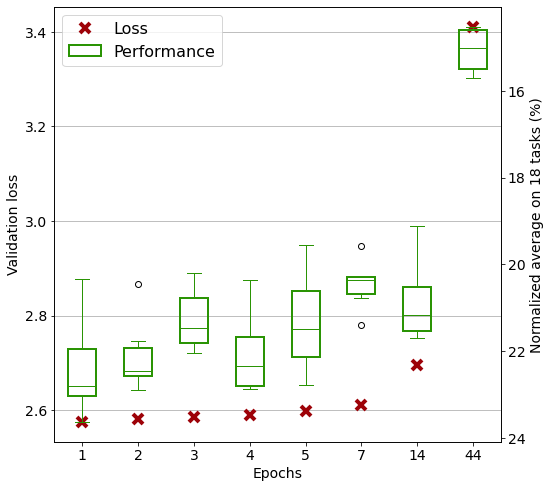

--2023-02-03 00:54:24--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_2b855b1b25oscar.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53273 (52K) [text/plain]
Saving to: ‘tensorboard_2b855b1b25oscar.csv.1’

tensorboard_2b855b1 100%[===================>]  52.02K   142KB/s    in 0.4s    

2023-02-03 00:54:25 (142 KB/s) - ‘tensorboard_2b855b1b25oscar.csv.1’ saved [53273/53273]

--2023-02-03 00:54:25--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_2b855b4boscar.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53024 (52K) 

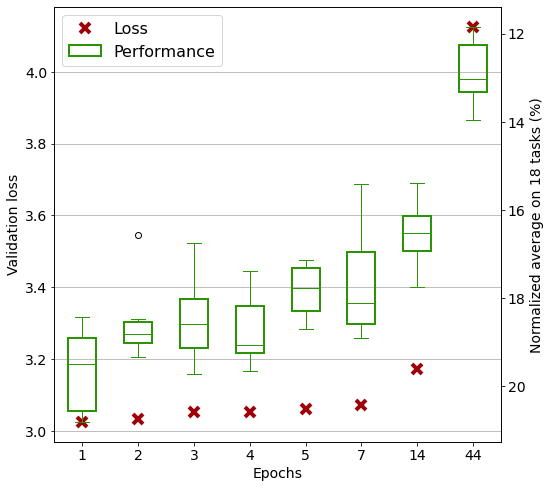

--2023-02-03 00:54:33--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_4b284b12bc4.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8076 (7.9K) [text/plain]
Saving to: ‘tensorboard_4b284b12bc4.csv.1’

tensorboard_4b284b1 100%[===================>]   7.89K  --.-KB/s    in 0s      

2023-02-03 00:54:34 (1.74 GB/s) - ‘tensorboard_4b284b12bc4.csv.1’ saved [8076/8076]

--2023-02-03 00:54:34--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_4b284b17bc4.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8062 (7.9K) [text/plain]
Sa

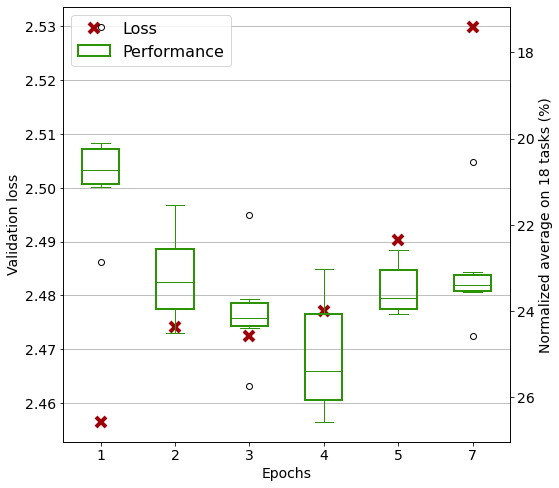

--2023-02-03 00:54:39--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_4b284b12boscar.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387 (6.2K) [text/plain]
Saving to: ‘tensorboard_4b284b12boscar.csv.1’

tensorboard_4b284b1 100%[===================>]   6.24K  --.-KB/s    in 0s      

2023-02-03 00:54:40 (906 MB/s) - ‘tensorboard_4b284b12boscar.csv.1’ saved [6387/6387]

--2023-02-03 00:54:40--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_4b284b17boscar.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6589 (6.4K) [tex

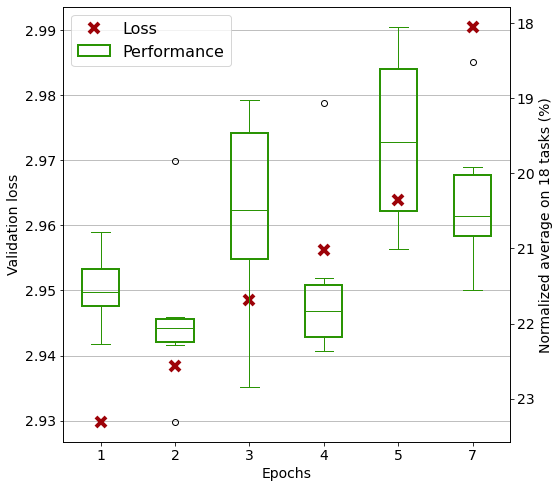

--2023-02-03 00:54:44--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_8b7178b25b.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8314 (8.1K) [text/plain]
Saving to: ‘tensorboard_8b7178b25b.csv.2’

tensorboard_8b7178b 100%[===================>]   8.12K  --.-KB/s    in 0s      

2023-02-03 00:54:45 (136 MB/s) - ‘tensorboard_8b7178b25b.csv.2’ saved [8314/8314]

--2023-02-03 00:54:45--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_8b7178b35b.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8314 (8.1K) [text/plain]
Saving 

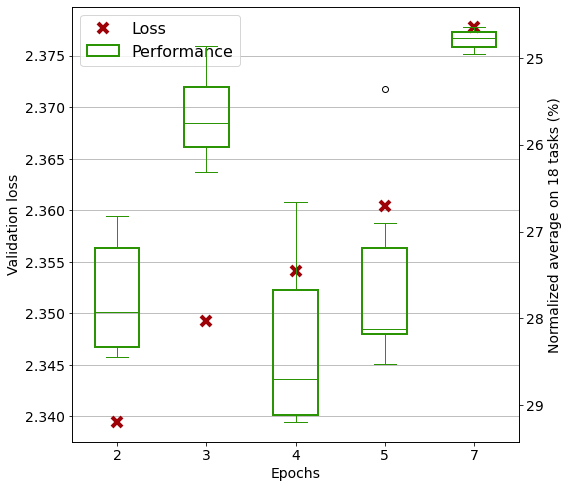

--2023-02-03 00:54:49--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_8b7178b25b.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8314 (8.1K) [text/plain]
Saving to: ‘tensorboard_8b7178b25b.csv.3’

tensorboard_8b7178b 100%[===================>]   8.12K  --.-KB/s    in 0s      

2023-02-03 00:54:50 (178 MB/s) - ‘tensorboard_8b7178b25b.csv.3’ saved [8314/8314]

--2023-02-03 00:54:50--  https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_8b7178b35b.csv
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e800:671:b733:ecf3:a585, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8314 (8.1K) [text/plain]
Saving 

FileNotFoundError: ignored

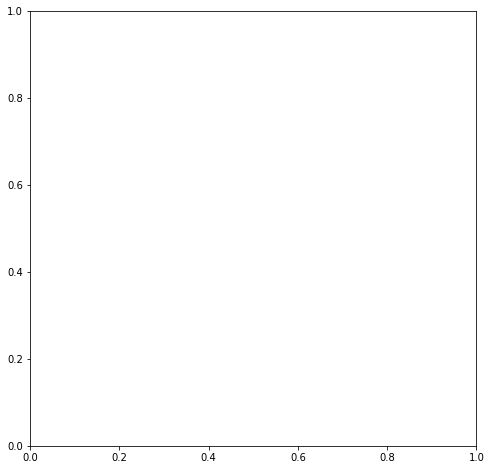

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List

# https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return smoothed

FONTSIZE = 14

for BASE_MODEL, MODEL_DICT in MODEL_TO_FEWSHOT_SCORES.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    LOSSES = []
    EPOCHS = []
    ALL_SCORES = []
    for MODEL, SCORES in MODEL_DICT.items():
        !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tensorboard_{MODEL}.csv
        
        df = pd.read_csv(f"tensorboard_{MODEL}.csv", index_col=0)
        df['value'] = smooth(df["value"].values.tolist(), weight=0.85)
        LOSSES.append(df.value.values.tolist()[-1])
        # Get reps
        EPOCHS.append({v: k for k, v in REPS_TO_MODELS[BASE_MODEL].items()}[MODEL])
        ALL_SCORES.append(SCORES)

    # Sort EPOCHS & everything like it
    EPOCHS, LOSSES, ALL_SCORES = zip(*sorted(zip(EPOCHS, LOSSES, ALL_SCORES), key=lambda x: x[0]))

    ax.plot(list(range(len(EPOCHS))), LOSSES, 'x', markersize=10, mew=4, color="#9D0208", label="Loss")
    ax2 = ax.twinx()

    bp = ax2.boxplot(
        ALL_SCORES, 
        positions=list(range(len(EPOCHS))),
        #widths=width(positions,w),
        patch_artist=True,
        vert=True,
        # Folds back on itself
        #notch=True,
        #bootstrap=10000,
        boxprops={'fill': None} # transparent https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
    )
    for patch in bp['boxes']:
        patch.set_facecolor('#2A9404') 
        patch.set(color="#2A9404", linewidth=2)   
    for median in bp['medians']:
        median.set_color('#2A9404')  
    for median in bp['whiskers']:
        median.set_color('#2A9404')    
    for median in bp['caps']:
        median.set_color('#2A9404')    
    for median in bp['fliers']:
        median.set_color('#2A9404')
        
    ax.set_xlabel("Epochs", fontsize=FONTSIZE)
    ax.set_ylabel("Validation loss", fontsize=FONTSIZE)
    ax2.set_ylabel("Normalized average on 18 tasks (%)", fontsize=FONTSIZE)

    ax2.set_ylim(list(reversed(ax2.get_ylim())))

    ax.set_xticks(list(range(len(EPOCHS))), EPOCHS, fontsize=FONTSIZE)
    ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
    ax2.tick_params(axis='both', which='major', labelsize=FONTSIZE)

    ax.grid(axis='y')

    handles, labels = ax.get_legend_handles_labels()
    # Add box to legend; https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes
    handles = handles[:1] + bp["boxes"]
    labels = [str(labels[0])] + ["Performance"] # + OPS
    ax.legend(handles, labels, prop={'size': FONTSIZE+2}, title_fontproperties={'weight':'bold'})

    plt.savefig(f"epochs_performance_single_prompt_{BASE_MODEL}.pdf", bbox_inches="tight")
    plt.show()


###### Simple boxplot

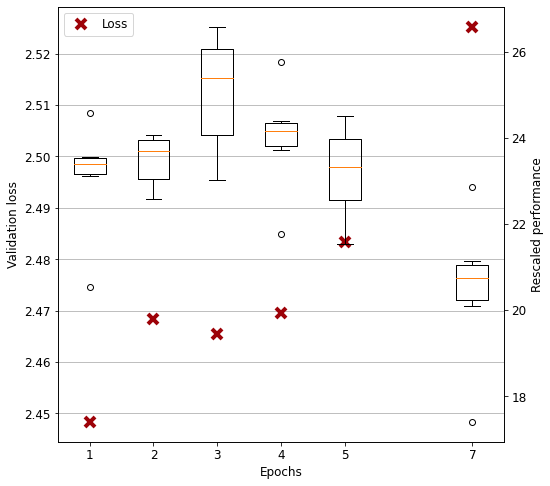

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
COLOR_MAP = {
    7: '#03071E',
    5: '#6A040F',
    4: '#D00000',
    3: '#E85D04',
    2: '#FB8500',
    1: '#FFBA08',
}

LOSSES = [
  2.525268077850342,
  2.483349323272705,
  2.4695968627929688,
  2.4654414653778076,
  2.468310832977295,
  2.4483046531677246
]

EPOCHS = [7, 5, 4, 3, 2, 1]

PARAMS_TICKS = [100e6, 300e6, 1e9, 3e9, 6e9, 30e9]
PARAMS_STR = ["100M", "300M", "1B", "3B", "6B", "30B"]


LOSS_MIN = 1.8
LOSS_MAX = 2.9

SHOTS = [0, 1, 2, 3, 4, 5]


fig, ax = plt.subplots(figsize=(8, 8))#, nrows=2, ncols=2)


ax.plot(EPOCHS, LOSSES, 'x', markersize=10, mew=4, color="#9D0208", label="Loss")
ax2 = ax.twinx()
ax2.boxplot(MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'].values(), positions=list(reversed(EPOCHS)))

ax.set_xlabel("Epochs", fontsize=12)
ax.set_ylabel("Validation loss", fontsize=12)
ax2.set_ylabel("Rescaled performance", fontsize=12)

ax.set_xticks(list(reversed(EPOCHS)), fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)


ax.grid(axis='y')

ax.legend(fontsize=12)
plt.savefig("epochs_performance_single_prompt.pdf", bbox_inches="tight")
plt.show()


###### Barplot

[0, 1, 2, 3, 4, 5, 6, 7]
[9, 10, 11, 12, 13, 14, 15, 16]
[18, 19, 20, 21, 22, 23, 24, 25]
[27, 28, 29, 30, 31, 32, 33, 34]
[36, 37, 38, 39, 40, 41, 42, 43]
[45, 46, 47, 48, 49, 50, 51, 52]
[0, 1, 2, 3, 4, 5, 6, 7]
[9, 10, 11, 12, 13, 14, 15, 16]
[18, 19, 20, 21, 22, 23, 24, 25]
[27, 28, 29, 30, 31, 32, 33, 34]
[36, 37, 38, 39, 40, 41, 42, 43]
[45, 46, 47, 48, 49, 50, 51, 52]
Missing scores for 4b284b1b9c4
Missing scores for 4b284b6bc4
[0, 1, 2, 3, 4, 5, 6, 7]
[9, 10, 11, 12, 13, 14, 15, 16]
[18, 19, 20, 21, 22, 23, 24, 25]
[27, 28, 29, 30, 31, 32, 33, 34]
[36, 37, 38, 39, 40, 41, 42, 43]
[45, 46, 47, 48, 49, 50, 51, 52]
[0, 1, 2, 3, 4, 5, 6, 7]
[9, 10, 11, 12, 13, 14, 15, 16]
[18, 19, 20, 21, 22, 23, 24, 25]
[27, 28, 29, 30, 31, 32, 33, 34]
[36, 37, 38, 39, 40, 41, 42, 43]
[45, 46, 47, 48, 49, 50, 51, 52]
[0, 1, 2, 3, 4, 5]
[7, 8, 9, 10, 11, 12]
[14, 15, 16, 17, 18, 19]
[21, 22, 23, 24, 25, 26]
[28, 29, 30, 31, 32, 33]
[35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5]
[7, 8, 9, 10, 11, 12]
[

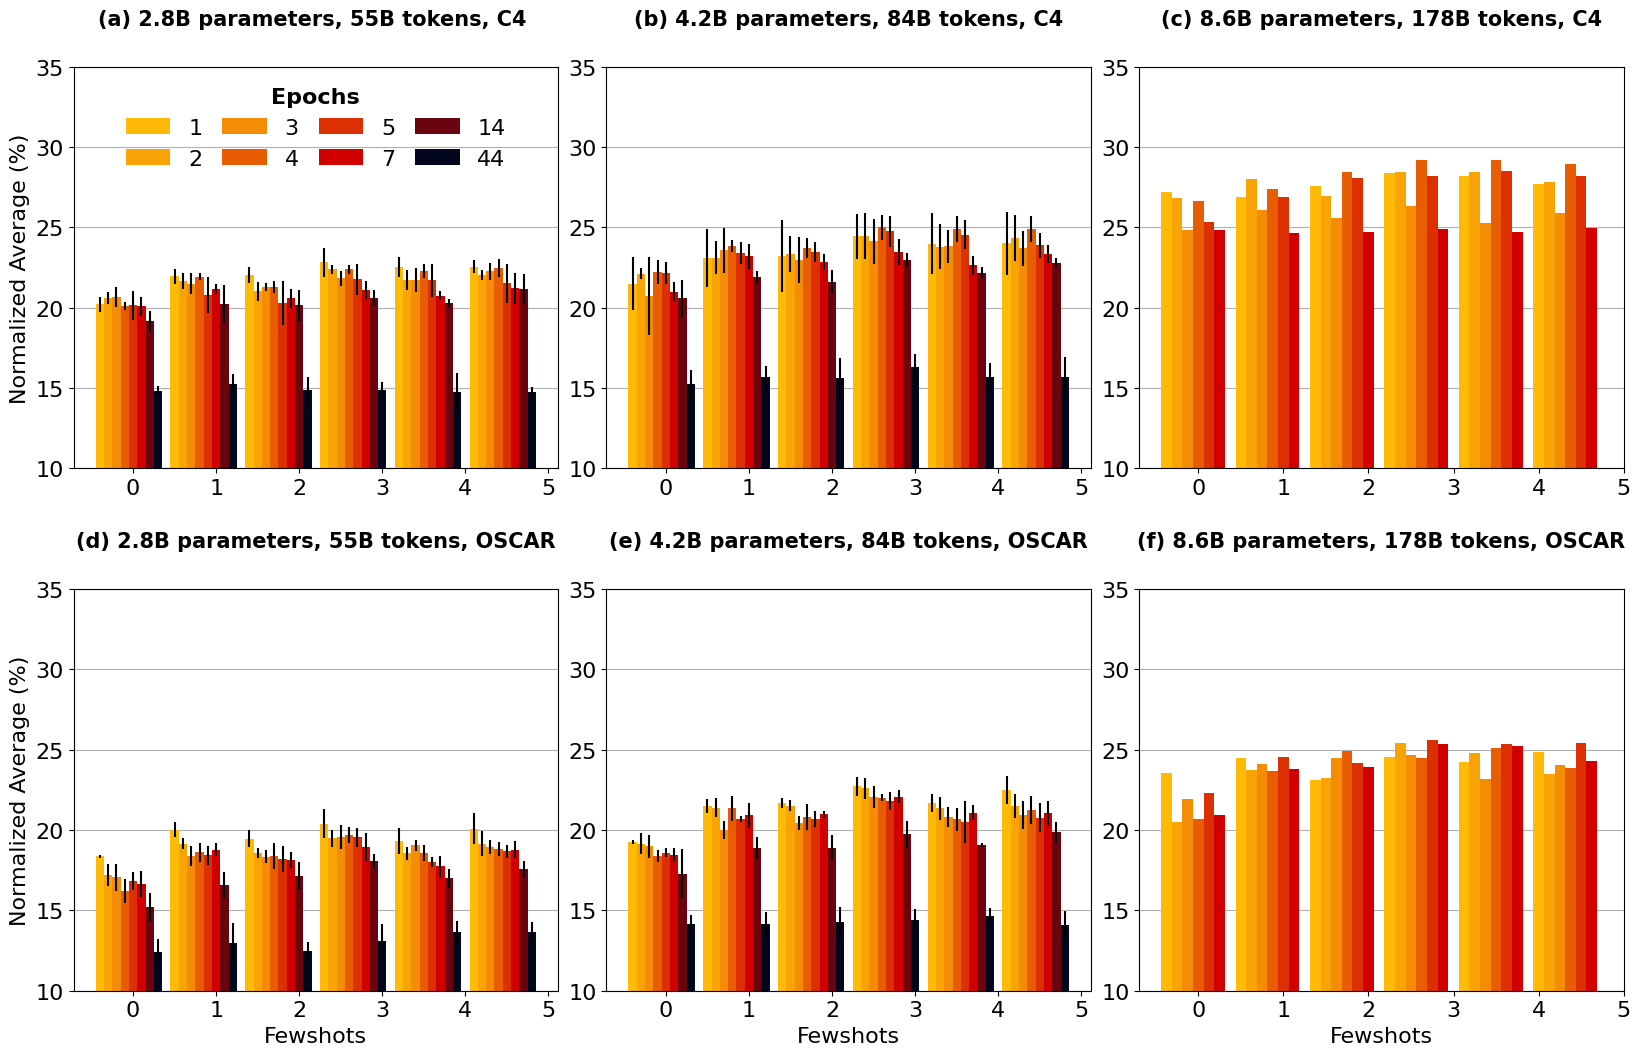

In [ ]:
# Bar plot instead with line being variance across multiple prompts (except for 8b just put no bar)
# group 1 of bars: epochs; group 2 of bars: shots; group 3 of bars: model params

### x-axis: params ; y-axis: loss / perf ; std: seeds ; grouped by shots


import numpy as np
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8, 8))

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08


PREFIX_TO_EPOCHS = {
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b1b9": 44,
    "4b284b6b": 14,
    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}

COLORS = list(reversed([
#    '#03071E',
    '#6A040F',
    '#D00000',
    '#E85D04',
    '#FB8500',
    "#FAA307",
    '#FFBA08',
]))

FONTSIZE = 16

fig, axes = plt.subplots(figsize=(20, 12), facecolor='w', nrows=2, ncols=3, edgecolor='k', sharey=False)
axes = axes.flatten()
plt.subplots_adjust(wspace=0.1, hspace=0.3)

GROUPS = [
    (0, "lm1-2b8-55b-c4-repetitions"),
    (3, "lm1-2b8-55b-oscar-repetitions"),

    (1, "lm1-4b2-84b-c4-repetitions"),
    (4, "lm1-4b2-84b-oscar-repetitions"),

    (2, "lm1-8b7-178b-c4-repetitions"),
    (5, "lm1-8b7-178b-oscar-repetitions"),
]

IDX_TO_TILE = {
    0: "(a) 2.8B parameters, 55B tokens, C4 ",
    1: "(b) 4.2B parameters, 84B tokens, C4",
    2: "(c) 8.6B parameters, 178B tokens, C4",
    3: "(d) 2.8B parameters, 55B tokens, OSCAR",
    4: "(e) 4.2B parameters, 84B tokens, OSCAR",
    5: "(f) 8.6B parameters, 178B tokens, OSCAR",       
}

for i, base_model in GROUPS:
    
    last_len = 0


    epoch_to_models = {}
    for model in MODEL_TO_FEWSHOT_SCORES[base_model]:
        prefix = model.replace("oscar","").replace("c4", "").replace("seed1","").replace("seed2","").replace("seed3","").replace("seed4", "").replace("v2", "")
        epoch_to_models.setdefault(PREFIX_TO_EPOCHS[prefix], [])
        if MODEL_TO_FEWSHOT_SCORES[base_model][model]:
            epoch_to_models[PREFIX_TO_EPOCHS[prefix]].append(model)
        else:
            print(f"Missing scores for {model}")
    epoch_to_models = dict(reversed(epoch_to_models.items()))
    colors = [EPOCHS_TO_COLOR[epoch] for epoch in epoch_to_models]
    
    for shots in list(range(0, 6)):
        scores_group = []
        scores_std_group = []
        for epoch in epoch_to_models:
            scores = [MODEL_TO_FEWSHOT_SCORES[base_model][model][shots] for model in epoch_to_models[epoch]]
            
            scores_mean = np.mean(scores)
            scores_std = np.std(scores)

            scores_group.append(scores_mean)
            scores_std_group.append(scores_std)
        
        x_positions = list(range(last_len, last_len + len(scores_group)))

        bar = axes[i].bar(
            #list(range(last_len + shots, last_len + shots + len(scores_group))),
            x_positions,
            scores_group,
            yerr=scores_std_group,
            color=colors,
            width=1,
        )
        #last_len += len(scores_group) + 1
        last_len += len(x_positions) + 1
        print(x_positions)

    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)
    if i > 2: 
        axes[i].set_xlabel("Fewshots", fontsize=FONTSIZE)
    if i == 0:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)
        axes[i].legend(
            [x for x in bar], 
            [str(x) for x in epoch_to_models], 
            title="Epochs", 
            fontsize=FONTSIZE,
            frameon=False,
            ncol=4,
            title_fontproperties={'weight': 'bold', "size": FONTSIZE},
            columnspacing=0.9,
            loc="upper center"
        )
        #list(range(0, 6)), ontsize=FONTSIZE)
        #[x for x in bar], list(range(0, 6)), title="Epochs", fontsize=FONTSIZE, ncol=6, loc="upper center", frameon=False)
    if i == 3:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)

    axes[i].set_ylim((10, 35))

    axes[i].set_xticks(
        [len(scores_group) // 2 + (j * (len(scores_group) + 2)) for j in range(6)], list(range(6))
    )

    axes[i].grid(axis='y')
    axes[i].set_axisbelow(True)

    #legend = axes[i].legend([x for x in bar], list(range(0, 6)), title="Epochs", fontsize=FONTSIZE, ncol=6, loc="upper center", frameon=False)

    # https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend
    #plt.setp(legend.get_title(), fontsize=FONTSIZE, fontweight="bold")

    #handles, labels = ax.get_legend_handles_labels()
    # Add box to legend; https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes
    #handles = handles[:1] + bp["boxes"]
    #labels = [str(labels[0])] + ["Performance"] # + OPS
    #ax.legend(handles, labels, prop={'size': 16}, title_fontproperties={'weight':'bold'})
    #plt.setp(plt.gca().get_legend().get_texts(), fontsize='16')

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE-1, fontweight="bold", pad=30)


plt.savefig(f"epochs_scores.pdf", bbox_inches="tight")
plt.show()




lm1-2b8-55b-c4-repetitions [[22.396648088888323, 21.652159983651888, 22.75040894920298, 21.519500617473465, 21.801790183583368], [22.107874868679605, 21.247152735152657, 21.797701427707143, 21.369086310774687, 21.407573814120223], [21.28252044962159, 21.289970852727723, 21.882257870565553, 21.53629819797869, 21.7474848863073], [22.055526869578784, 21.635664904189856, 21.935953584718536, 21.384646736404903, 21.74277416877221], [21.331732426649733, 22.010831705668323, 21.979844801136323, 19.398446340171898, 20.441213687659445], [20.461263271474674, 20.88380610794377, 21.171654733486154, 20.74638814709033, 20.82033130073862], [20.853481602477746, 20.25644326656385, 19.26026246695645, 20.341550017225, 20.690466766210708], [15.052339301082968, 14.193490262742337, 15.4883233740958, 14.733336165923008, 15.017288339036376]]
[0, 1, 2, 3, 4, 5, 6, 7]
Missing scores for 4b284b1b9c4
Missing scores for 4b284b6bc4
lm1-4b2-84b-c4-repetitions [[19.958632375773618, 24.594419818745724, 24.7092029644742,

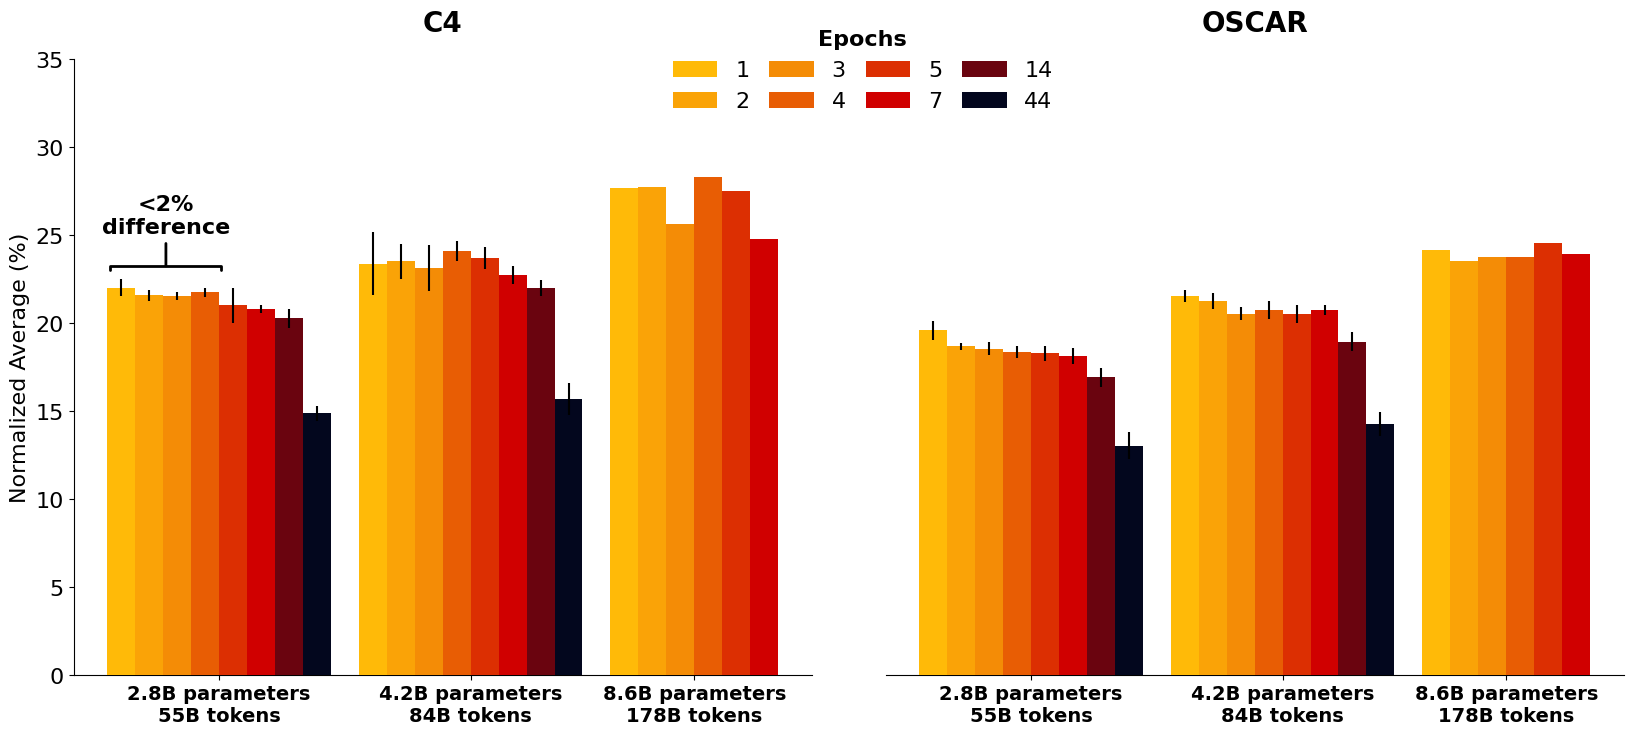

In [ ]:
# Bar plot instead with line being variance across multiple prompts (except for 8b just put no bar)
# group 1 of bars: epochs; group 2 of bars: shots; group 3 of bars: model params

### x-axis: params ; y-axis: loss / perf ; std: seeds ; grouped by shots


import numpy as np
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8, 8))

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08


PREFIX_TO_EPOCHS = {
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b1b9": 44,
    "4b284b6b": 14,
    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}

COLORS = list(reversed([
#    '#03071E',
    '#6A040F',
    '#D00000',
    '#E85D04',
    '#FB8500',
    "#FAA307",
    '#FFBA08',
]))

FONTSIZE = 16

fig, axes = plt.subplots(figsize=(20, 8), facecolor='w', nrows=1, ncols=2, edgecolor='k', sharey=True)
axes = axes.flatten()
plt.subplots_adjust(wspace=0.1, hspace=0.3)

GROUPS = [
    (0, "lm1-2b8-55b-c4-repetitions"),
    (3, "lm1-2b8-55b-oscar-repetitions"),

    (1, "lm1-4b2-84b-c4-repetitions"),
    (4, "lm1-4b2-84b-oscar-repetitions"),

    (2, "lm1-8b7-178b-c4-repetitions"),
    (5, "lm1-8b7-178b-oscar-repetitions"),
]

GROUPS = [
    ("lm1-2b8-55b-c4-repetitions", "lm1-4b2-84b-c4-repetitions", "lm1-8b7-178b-c4-repetitions"),
    ("lm1-2b8-55b-oscar-repetitions", "lm1-4b2-84b-oscar-repetitions", "lm1-8b7-178b-oscar-repetitions")
]

IDX_TO_TILE = {
    0: "C4",
    1: "OSCAR",    
}


for i, group in enumerate(GROUPS):

    scores_group = []
    scores_std_group = []
    last_len = 0

    for j, base_model in enumerate(group):

        epoch_to_models = {}
        for model in MODEL_TO_FEWSHOT_SCORES[base_model]:
            prefix = model.replace("oscar","").replace("c4", "").replace("seed1","").replace("seed2","").replace("seed3","").replace("seed4", "").replace("v2", "")
            epoch_to_models.setdefault(PREFIX_TO_EPOCHS[prefix], [])
            if MODEL_TO_FEWSHOT_SCORES[base_model][model]:
                epoch_to_models[PREFIX_TO_EPOCHS[prefix]].append(model)
            else:
                print(f"Missing scores for {model}")
        epoch_to_models = dict(reversed(epoch_to_models.items()))
        colors = [EPOCHS_TO_COLOR[epoch] for epoch in epoch_to_models]

        scores_all = []
        # Iterathe through epochs -> Shots -> Seeds
        for epoch in epoch_to_models:
            scores_all_shots = []
            for shots in list(range(0, 6)):
                # Create list of shot scores of all models
                scores = [MODEL_TO_FEWSHOT_SCORES[base_model][model][shots] for model in epoch_to_models[epoch]]
                scores_all_shots.append(scores)
            # Average shots for each seed model & append
            scores_all_shots = [
                sum([scores_all_shots[shot][i] for shot in list(range(0, 6))]) / len(list(range(0, 6)))
                for i, model in enumerate(epoch_to_models[epoch])
            ]

            scores_all.append(scores_all_shots)
        
        print(base_model, scores_all)
        # Average seeds & compute std across seeds
        scores_mean = [np.mean(x) for x in scores_all]
        scores_std = [np.std(x) for x in scores_all]

        x_positions = list(range(last_len, last_len + len(scores_mean)))

        bar = axes[i].bar(
            #list(range(last_len + shots, last_len + shots + len(scores_group))),
            x_positions,
            scores_mean,
            yerr=scores_std,
            color=colors,
            width=1,
            zorder=3,
        )

        last_len += len(x_positions) + 1
        print(x_positions)

        if (i == 0) and (j == 0):
            plt.legend(
                [x for x in bar], 
                [str(x) for x in epoch_to_models], 
                title="Epochs", 
                fontsize=FONTSIZE,
                frameon=False,
                ncol=4,
                title_fontproperties={'weight': 'bold', "size": FONTSIZE},
                columnspacing=0.9,
                loc=(-0.3, 0.9), #"upper center"

            )
    
    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)
    axes[i].set_ylim((0, 35))
    
    if i == 0:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)
        axes[i].spines[['right', 'top']].set_visible(False)
    elif i == 1:
        axes[i].spines[['left', 'right', 'top']].set_visible(False)
        #axes[i].tick_params(
        #axis='y',          # changes apply to the x-axis
        #which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        #top=False,         # ticks along the top edge are off
        #labelbottom=False) # labels along the bottom edge are off
        # https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
        axes[i].yaxis.set_ticks_position('none') 

    
    axes[i].set_xticks(
        [3.5, 12.5, 20.5],
        ["2.8B parameters\n55B tokens", "4.2B parameters\n84B tokens", "8.6B parameters\n178B tokens"],
        fontsize=FONTSIZE-2, 
        fontweight="bold", 
        #pad=30,
    )
    

    #axes[i].set_xticks(
    #    [len(scores_group) // 2 + (j * (len(scores_group) + 2)) for j in range(6)], list(range(6))
    #)
    #axes[i].grid(axis='y')
    axes[i].set_axisbelow(True)

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE+4, fontweight="bold", pad=20)

#plt.annotate(
#    r"$\}$",
#    fontsize=50,
#    xy=(0.27, 0.77), 
#    xycoords='figure fraction',
#    rotation=90,
#    fontweight="light",
#)
plt.annotate('<2%\ndifference', 
            xy=(-0.975, 0.66), 
            xytext=(-0.975, 0.71), 
            xycoords='axes fraction', 
            fontsize=FONTSIZE,
            fontweight="bold",
            ha='center', va='bottom',
            #bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=2.5', lw=2.0)
)


plt.savefig(f"epochs_scores.pdf", bbox_inches="tight")
plt.show()




lm1-2b8-55b-c4-repetitions [[22.396648088888323, 21.652159983651888, 22.75040894920298, 21.519500617473465, 21.801790183583368], [22.107874868679605, 21.247152735152657, 21.797701427707143, 21.369086310774687, 21.407573814120223], [21.28252044962159, 21.289970852727723, 21.882257870565553, 21.53629819797869, 21.7474848863073], [22.055526869578784, 21.635664904189856, 21.935953584718536, 21.384646736404903, 21.74277416877221], [21.331732426649733, 22.010831705668323, 21.979844801136323, 19.398446340171898, 20.441213687659445], [20.461263271474674, 20.88380610794377, 21.171654733486154, 20.74638814709033, 20.82033130073862], [20.853481602477746, 20.25644326656385, 19.26026246695645, 20.341550017225, 20.690466766210708], [15.052339301082968, 14.193490262742337, 15.4883233740958, 14.733336165923008, 15.017288339036376]]
lm1-4b2-84b-c4-repetitions [[19.958632375773618, 24.594419818745724, 24.7092029644742, 24.374382430084406, 23.25579389090211], [23.197952301182017, 23.793149488426337, 22.3

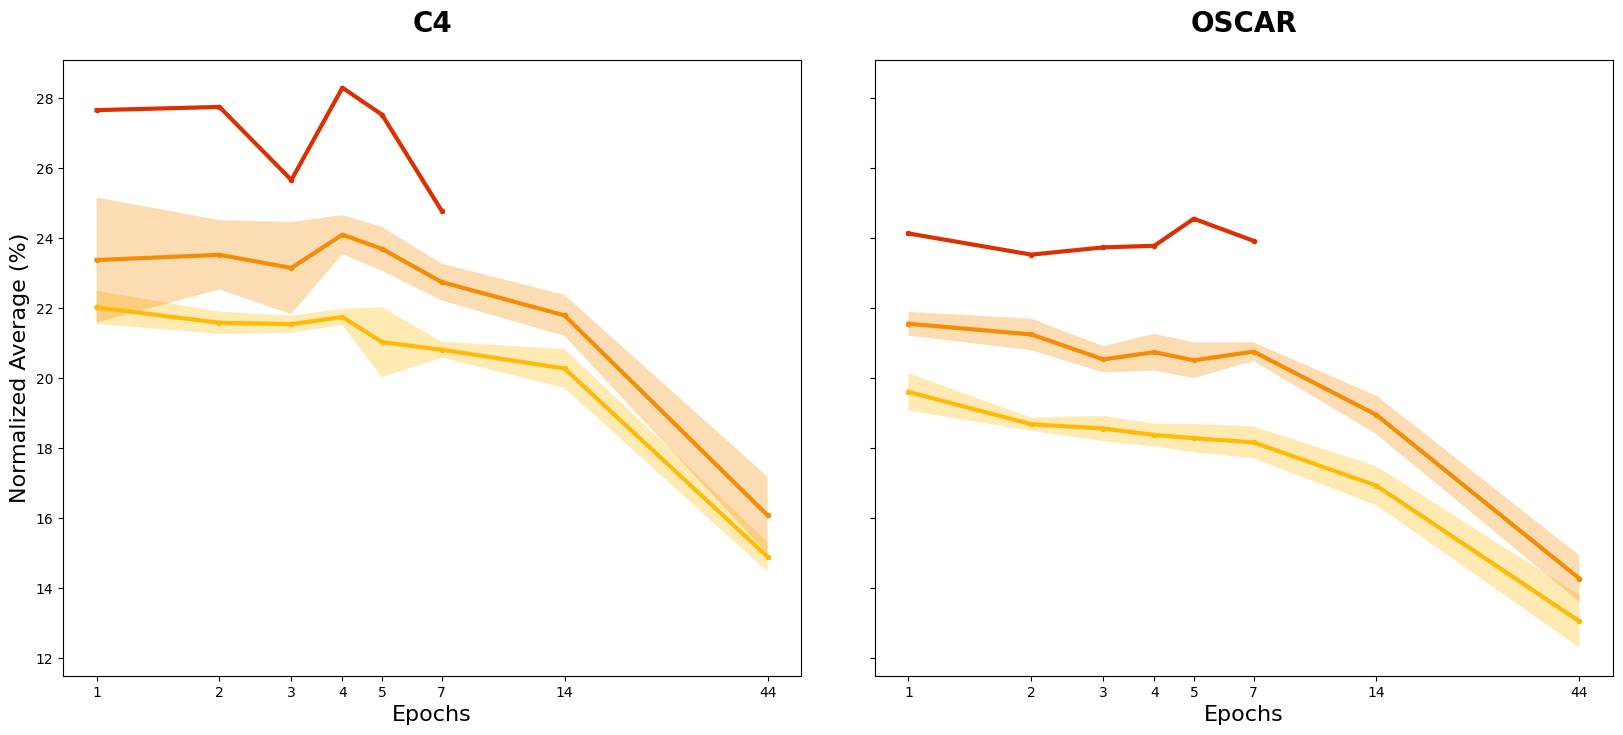

In [ ]:
# Plot with lines & margin of error instead
import numpy as np
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8, 8))

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08

PREFIX_TO_EPOCHS = {
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b1b9": 44,
    "4b284b6b": 14,
    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}

COLORS = list(reversed([
#    '#03071E',
    '#6A040F',
    '#D00000',
    '#E85D04',
    '#FB8500',
    "#FAA307",
    '#FFBA08',
]))

FONTSIZE = 16

fig, axes = plt.subplots(figsize=(20, 8), facecolor='w', nrows=1, ncols=2, edgecolor='k', sharey=True)
axes = axes.flatten()
plt.subplots_adjust(wspace=0.1, hspace=0.3)


GROUPS = [
    ("lm1-2b8-55b-c4-repetitions", "lm1-4b2-84b-c4-repetitions", "lm1-8b7-178b-c4-repetitions"),
    ("lm1-2b8-55b-oscar-repetitions", "lm1-4b2-84b-oscar-repetitions", "lm1-8b7-178b-oscar-repetitions")
]

IDX_TO_TILE = {
    0: "C4",
    1: "OSCAR",    
}


for i, group in enumerate(GROUPS):

    scores_group = []
    scores_std_group = []
    last_len = 0

    for j, base_model in enumerate(group):

        epoch_to_models = {}
        for model in MODEL_TO_FEWSHOT_SCORES[base_model]:
            prefix = model.replace("oscar","").replace("c4", "").replace("seed1","").replace("seed2","").replace("seed3","").replace("seed4", "").replace("v2", "")
            epoch_to_models.setdefault(PREFIX_TO_EPOCHS[prefix], [])
            if MODEL_TO_FEWSHOT_SCORES[base_model][model]:
                epoch_to_models[PREFIX_TO_EPOCHS[prefix]].append(model)
            else:
                print(f"Missing scores for {model}")
        epoch_to_models = dict(reversed(epoch_to_models.items()))
        colors = [EPOCHS_TO_COLOR[epoch] for epoch in epoch_to_models]

        scores_all = []
        # Iterathe through epochs -> Shots -> Seeds
        for epoch in epoch_to_models:
            scores_all_shots = []
            for shots in list(range(0, 6)):
                # Create list of shot scores of all models
                scores = [MODEL_TO_FEWSHOT_SCORES[base_model][model][shots] for model in epoch_to_models[epoch]]
                scores_all_shots.append(scores)
            # Average shots for each seed model & append
            scores_all_shots = [
                sum([scores_all_shots[shot][i] for shot in list(range(0, 6))]) / len(list(range(0, 6)))
                for i, model in enumerate(epoch_to_models[epoch])
            ]

            scores_all.append(scores_all_shots)
        
        print(base_model, scores_all)
        # Average seeds & compute std across seeds
        scores_mean = np.array([np.mean(x) for x in scores_all])
        scores_std = np.array([np.std(x) for x in scores_all])

        x_positions = list(range(last_len, last_len + len(scores_mean)))

        axes[i].plot(
            np.log10(list(epoch_to_models.keys())),
            #x_positions,
            scores_mean,
            #yerr=scores_std,
            color=colors[j*2],
            linewidth=3.0,
            marker=".",
            #width=1,
            #zorder=3,
        )
        axes[i].fill_between(
            np.log10(list(epoch_to_models.keys())),
            scores_mean - (scores_std), 
            scores_mean + (scores_std),
            alpha=0.3,
            facecolor=colors[j*2],
        )

    if i == 0:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)
    axes[i].set_xlabel("Epochs", fontsize=FONTSIZE)

        #axes[i].spines[['right', 'top']].set_visible(False)
    #elif i == 1:
        #axes[i].spines[['left', 'right', 'top']].set_visible(False)
        #axes[i].tick_params(
        #axis='y',          # changes apply to the x-axis
        #which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        #top=False,         # ticks along the top edge are off
        #labelbottom=False) # labels along the bottom edge are off
        # https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
        #axes[i].yaxis.set_ticks_position('none') 

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE+4, fontweight="bold", pad=20)


    axes[i].set_xticks(
        np.log10([1, 2, 3, 4, 5, 7, 14, 44]),
        [1, 2, 3, 4, 5, 7, 14, 44],   
    )




plt.savefig(f"epochs_scores.pdf", bbox_inches="tight")
plt.show()





In [ ]:
# Plot with lines & margin of error instead
import numpy as np
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8, 8))

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08

PREFIX_TO_EPOCHS = {
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b1b9": 44,
    "4b284b6b": 14,
    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}

COLORS = list(reversed([
#    '#03071E',
    '#6A040F',
    '#D00000',
    '#E85D04',
    '#FB8500',
    "#FAA307",
    '#FFBA08',
]))

FONTSIZE = 16

#fig, axes = plt.subplots(figsize=(24, 12), facecolor='w', nrows=2, ncols=3, edgecolor='k', sharey=True)
fig = plt.figure(layout='constrained', figsize=(24, 12))
subfigs = fig.subfigures(2, 1)
subfigs[0].suptitle('Models trained on C4', fontsize=FONTSIZE+6)
subfigs[1].suptitle('Models trained on OSCAR', fontsize=FONTSIZE+6)

axes_top = subfigs[0].subplots(1, 3)#, sharey=True)
axes_bot = subfigs[1].subplots(1, 3)#, sharey=True)

axes = list(axes_top.flatten()) + list(axes_bot.flatten())

plt.subplots_adjust(wspace=0.1, hspace=0.3)



GROUPS = [
    ("lm1-2b8-55b-c4-repetitions",), ("lm1-2b8-55b-oscar-repetitions",),
    ("lm1-4b2-84b-c4-repetitions",), ("lm1-4b2-84b-oscar-repetitions",),
    ("lm1-8b7-178b-c4-repetitions",), ("lm1-8b7-178b-oscar-repetitions",),
]

GROUPS = [
    ("lm1-2b8-55b-c4-repetitions",),  
    ("lm1-4b2-84b-c4-repetitions",), 
    ("lm1-8b7-178b-c4-repetitions",),
    ("lm1-2b8-55b-oscar-repetitions",),
    ("lm1-4b2-84b-oscar-repetitions",),
    ("lm1-8b7-178b-oscar-repetitions",),
]

IDX_TO_TILE = {
    0: "C4",
    1: "OSCAR",    
}

IDX_TO_TILE = {
    0: "(a) 2.8B parameters",
    1: "(b) 4.2B parameters",
    2: "(c) 8.6B parameters",
    3: "(d) 2.8B parameters",
    4: "(e) 4.2B parameters",
    5: "(f) 8.6B parameters",       
}


for i, group in enumerate(GROUPS):

    scores_group = []
    scores_std_group = []
    last_len = 0

    for j, base_model in enumerate(group):

        epoch_to_models = {}
        for model in MODEL_TO_FEWSHOT_SCORES[base_model]:
            prefix = model.replace("oscar","").replace("c4", "").replace("seed1","").replace("seed2","").replace("seed3","").replace("seed4", "").replace("v2", "")
            epoch_to_models.setdefault(PREFIX_TO_EPOCHS[prefix], [])
            if MODEL_TO_FEWSHOT_SCORES[base_model][model]:
                epoch_to_models[PREFIX_TO_EPOCHS[prefix]].append(model)
            else:
                print(f"Missing scores for {model}")
        epoch_to_models = dict(reversed(epoch_to_models.items()))
        colors = [EPOCHS_TO_COLOR[epoch] for epoch in epoch_to_models]

        scores_all = []
        # Iterathe through epochs -> Shots -> Seeds
        for epoch in epoch_to_models:
            scores_all_shots = []
            for shots in list(range(0, 6)):
                # Create list of shot scores of all models
                scores = [MODEL_TO_FEWSHOT_SCORES[base_model][model][shots] for model in epoch_to_models[epoch]]
                scores_all_shots.append(scores)
            # Average shots for each seed model & append
            scores_all_shots = [
                sum([scores_all_shots[shot][i] for shot in list(range(0, 6))]) / len(list(range(0, 6)))
                for i, model in enumerate(epoch_to_models[epoch])
            ]

            scores_all.append(scores_all_shots)
        
        print(base_model, scores_all)
        # Average seeds & compute std across seeds
        scores_mean = np.array([np.mean(x) for x in scores_all])
        scores_std = np.array([np.std(x) for x in scores_all])

        x_positions = list(range(last_len, last_len + len(scores_mean)))

        axes[i].errorbar(
            np.log10(list(epoch_to_models.keys())),
            scores_mean,
            yerr=scores_std,
            color=colors[j*2],
            linewidth=3.0,
            marker=".",
            markersize=16,
        )
        
        """
        axes[i].plot(
            np.log10(list(epoch_to_models.keys())),
            #x_positions,
            scores_mean,
            #yerr=scores_std,
            color=colors[j*2],
            linewidth=3.0,
            marker=".",
            markersize=16,
            #width=1,
            #zorder=3,
        )
        axes[i].fill_between(
            np.log10(list(epoch_to_models.keys())),
            scores_mean - (scores_std), 
            scores_mean + (scores_std),
            alpha=0.3,
            facecolor=colors[j*2],
        )
        """

    if i == 0 or i == 3:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)
    if i >=3:
        axes[i].set_xlabel("Epochs", fontsize=FONTSIZE)
    if i == 2 or i == 5:
        s, e = axes[i].get_ylim()
        axes[i].set_ylim(s-4, e+4)

        #axes[i].spines[['right', 'top']].set_visible(False)
    #elif i == 1:
        #axes[i].spines[['left', 'right', 'top']].set_visible(False)
        #axes[i].tick_params(
        #axis='y',          # changes apply to the x-axis
        #which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        #top=False,         # ticks along the top edge are off
        #labelbottom=False) # labels along the bottom edge are off
        # https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
        #axes[i].yaxis.set_ticks_position('none') 

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE-4, fontweight="bold", pad=16)

    #if len(epoch_to_models) == 8:
    axes[i].set_xticks(
        #np.log10([1, 2, 3, 4, 5, 7, 14, 44]),
        #[1, 2, 3, 4, 5, 7, 14, 44],   
        np.log10([1, 44]),
        [1, 44],           
    )
    #else:
    #    axes[i].set_xticks(
    #        np.log10([1, 2, 3, 4, 5, 7]),
    #        [1, 2, 3, 4, 5, 7],   
    #    )




plt.savefig(f"epochs_scores.pdf", bbox_inches="tight")
plt.show()





In [ ]:
subfigs[0][1]

array([<matplotlib.figure.SubFigure object at 0x7f85c011e710>,
      dtype=object)

In [ ]:
`# Bar plot instead with line being variance across multiple prompts (except for 8b just put no bar)
# group 1 of bars: epochs; group 2 of bars: shots; group 3 of bars: model params

### x-axis: params ; y-axis: loss / perf ; std: seeds ; grouped by shots


import numpy as np
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8, 8))

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08


PREFIX_TO_EPOCHS = {
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}

COLORS = list(reversed([
#    '#03071E',
    '#6A040F',
    '#D00000',
    '#E85D04',
    '#FB8500',
    "#FAA307",
    '#FFBA08',
]))

FONTSIZE = 16

fig, axes = plt.subplots(figsize=(20, 8), facecolor='w', nrows=1, ncols=2, edgecolor='k', sharey=True)
axes = axes.flatten()
plt.subplots_adjust(wspace=0.1, hspace=0.3)

GROUPS = [
    (0, "lm1-2b8-55b-c4-repetitions"),
    (3, "lm1-2b8-55b-oscar-repetitions"),

    (1, "lm1-4b2-84b-c4-repetitions"),
    (4, "lm1-4b2-84b-oscar-repetitions"),

    (2, "lm1-8b7-178b-c4-repetitions"),
    (5, "lm1-8b7-178b-oscar-repetitions"),
]

GROUPS = [
    ("lm1-2b8-55b-c4-repetitions", "lm1-4b2-84b-c4-repetitions", "lm1-8b7-178b-c4-repetitions"),
    ("lm1-2b8-55b-oscar-repetitions", "lm1-4b2-84b-oscar-repetitions", "lm1-8b7-178b-oscar-repetitions")
]

IDX_TO_TILE = {
    0: "C4",
    1: "OSCAR",    
}


for i, group in enumerate(GROUPS):

    scores_group = []
    scores_std_group = []
    last_len = 0

    for j, base_model in enumerate(group):

        epoch_to_models = {}
        for model in MODEL_TO_FEWSHOT_SCORES[base_model]:
            prefix = model.replace("oscar","").replace("c4", "").replace("seed1","").replace("seed2","").replace("seed3","").replace("seed4", "").replace("v2", "")
            epoch_to_models.setdefault(PREFIX_TO_EPOCHS[prefix], [])
            if MODEL_TO_FEWSHOT_SCORES[base_model][model]:
                epoch_to_models[PREFIX_TO_EPOCHS[prefix]].append(model)
            else:
                print(f"Missing scores for {model}")
        epoch_to_models = dict(reversed(epoch_to_models.items()))
        colors = [EPOCHS_TO_COLOR[epoch] for epoch in epoch_to_models]

        scores_all = []
        # Iterathe through epochs -> Shots -> Seeds
        for epoch in epoch_to_models:
            scores_all_shots = []
            for shots in list(range(0, 6)):
                # Create list of shot scores of all models
                scores = [MODEL_TO_FEWSHOT_SCORES[base_model][model][shots] for model in epoch_to_models[epoch]]
                scores_all_shots.append(scores)
            # Average shots for each seed model & append
            scores_all_shots = [
                sum([scores_all_shots[shot][i] for shot in list(range(0, 6))]) / len(list(range(0, 6)))
                for i, model in enumerate(epoch_to_models[epoch])
            ]

            scores_all.append(scores_all_shots)
        
        print(base_model, scores_all)
        # Average seeds & compute std across seeds
        scores_mean = [np.mean(x) for x in scores_all]
        scores_std = [np.std(x) for x in scores_all]

        x_positions = list(range(last_len, last_len + len(scores_mean)))

        bar = axes[i].boxplot(
            #list(range(last_len + shots, last_len + shots + len(scores_group))),
            scores_mean,
            positions=x_positions,
            yerr=scores_std,
            color=colors,
            width=1,
        )

        last_len += len(x_positions) + 1
        print(x_positions)

        if (i == 0) and (j == 0):
            axes[i].legend(
                [x for x in bar], 
                [str(x) for x in epoch_to_models], 
                title="Epochs", 
                fontsize=FONTSIZE,
                frameon=False,
                ncol=4,
                title_fontproperties={'weight': 'bold', "size": FONTSIZE},
                columnspacing=0.9,
                loc="upper center"
            )
    
    if i == 0:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)

    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    axes[i].set_ylim((10, 35))

    axes[i].set_xticks(
        [3.5, 11.5, 18.5],
        ["2.8B parameters\n55B tokens", "4.2B parameters\n84B tokens", "8.6B parameters\n178B tokens"],
        fontsize=FONTSIZE-2, 
        fontweight="bold", 
        #pad=30,
    )

    #axes[i].set_xticks(
    #    [len(scores_group) // 2 + (j * (len(scores_group) + 2)) for j in range(6)], list(range(6))
    #)
    axes[i].grid(axis='y')
    axes[i].set_axisbelow(True)

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE+4, fontweight="bold", pad=20)

plt.savefig(f"epochs_scores.pdf", bbox_inches="tight")
plt.show()




In [ ]:
!pip install -q --upgrade plotly
!pip install -q pyyaml==5.4.1  # plotly dependency workaround
!pip install -q -U kaleido  # vector graphics engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00


In [ ]:
def add_task_names(fig):
    # # sans serif
    # fig.add_annotation(x=4, y=1.2, text='<b>Natural Language Inference</b>', xref='x domain', yref='y domain', showarrow=False)
    # fig.add_annotation(x=0.5, y=-0.25, text='<b>Coreference Resolution</b>', xref='x domain', yref='y domain', showarrow=False)
    # fig.add_annotation(x=4.5, y=-0.25, text='<b>Sentence Completion</b>', xref='x domain', yref='y domain', showarrow=False)
    # fig.add_annotation(x=6.75, y=-0.25, text='<b>Word Sense</b>', xref='x domain', yref='y domain', showarrow=False)

    # serif, although Colab doesn't have matching fonts
    fig.add_annotation(x=4.5, y=1.4, text='<b>Natural Language Inference</b>', xref='x domain', yref='y domain', font={'size': 21}, showarrow=False)
    fig.add_annotation(x=9.4, y=1.4, text='<b>Coreference Resolution</b>', xref='x domain', yref='y domain', font={'size': 21}, showarrow=False)
    fig.add_annotation(x=5.6, y=-0.2, text='<b>Sentence Completion</b>', xref='x domain', yref='y domain', font={'size': 21}, showarrow=False)


main_layout = dict(
    width=1500, 
    height=700, 
    font_size=15,  # axis ticks 
    font_family='Times New Roman',
    template='plotly_white',
    margin_l=5, margin_r=5,
    legend=dict(
        yanchor='bottom', y=-0.11, xanchor='center', x=0.5, font_size=18,
        bgcolor='rgba(0,0,0,0)', title_text='', orientation='h')
)


row_specs = [
    [
        {}, 
        {}, 
        {}, 
        {}, 
        {}, 
        {},
        {}, 
        {},     
    ],
    [  
        {}, 
        {}, 
        {}, 
        {}, 
        {}, 
        {},
        {}, 
        {}, 
    ],
]

MODELS = {
    #"mT0-13B": mt5_xxl,
    "BLOOM-7.1B": bloom_7b1,
    "BLOOM": bloom,
    "BLOOMZ-7.1B": bloomz_7b1,
#    "BLOOMZ-P3": bloomz_p3,
    "BLOOMZ": bloomz,
#    "mT0-13B": mt0_xxl,
}


datasets_by_row = [
    ['XNLI BG', 'XNLI DE', 'XNLI EL', 'XNLI RU', 'XNLI TH'],
    ["XNLI TR", 'XCOPA ET', 'XCOPA HT', 'XCOPA IT', 'XCOPA QU',],
    ['XCOPA TR', 'XStoryCloze MY', 'XStoryCloze RU', 'XWinograd JP', 'XWinograd RU'],
]

datasets_by_row = [
    ['XNLI BG', 'XNLI DE', 'XNLI EL', 'XNLI RU', 'XNLI TH', "XNLI TR", 'XWinograd JP', 'XWinograd RU'],
    ['XCOPA ET', 'XCOPA HT', 'XCOPA IT', 'XCOPA QU','XCOPA TH', 'XCOPA TR', 'XStoryCloze MY', 'XStoryCloze RU'],
]

flatten_dataset_names = [y for x in datasets_by_row for y in x]


runs = ['BLOOM-7.1B', 'BLOOM', 'BLOOMZ-7.1B', 'BLOOMZ'] # 'BLOOMZ-P3'

fig_specific_names = {
    'T5+LM (11B)': 'p = 0 (T5+LM)', 
    'T0 (p = 1)': 'p = 1',
    'T0 (p = 5.7)': 'p = 5.7',
    'T0': 'p = 8.03 (T0)',
}

y_ranges = {  # v1 bar chart scale
    'RTE': [0, 89],
    'CB': [0, 89],
    'ANLI': [15, 71],
    'XNLI': [15, 61],
    'WSC': [0, 81],
    'Winogrande': [35, 71],
    'XWinograd': [35, 71],
    'COPA': [35, 85],
    'XCOPA': [35, 81],   
    'StoryCloze': [35, 105],
    'XStoryCloze': [35, 91],
    'HellaSwag': [0, 105],  # sota?
    'WiC': [0, 81],  # sota?
}

def box_plot(points):
    fig = px.box(  
        points, x='runs', y='score', color='runs', points='all',
        template='plotly_white', color_discrete_map=color_map,
        category_orders={'runs': runs}, #labels=fig_specific_names,
        hover_data=['prompt_name'])
    fig.update_traces(
        marker_size=8, marker_opacity=0.3, line_width=1.5,
        marker_line={'width': 0.5, 'color': 'DarkSlateGrey'},
        jitter=0)
    return fig

fig = make_subplots(
    rows=2, cols=8, vertical_spacing=0.2,#8, 
    subplot_titles=flatten_dataset_names, specs=row_specs)

for row_idx, row_of_datasets in enumerate(datasets_by_row):
    for col_idx, d_name in enumerate(row_of_datasets):
        df_list = []
        for model, res_df in MODELS.items():
            d_name_full = DATASET_TO_NAME.get(d_name, d_name.lower().replace(" ", "_"))
            df = res_df["test"].data.to_pandas()
            df = df.loc[(df["task_name"] == d_name_full) & (df["prompt_name"].str.endswith(("ht", "mt")) == False)]
            df["dataset_name"] = d_name
            df["runs"] = model
            df["score"] *= 100
            if len(df) != 5: print(f"Unexpected length {len(df)} for {model} for {d_name}")
            df_list.append(df)
        df = pd.concat(df_list)
        subplot = box_plot(df)
        for tr in subplot.data:
            tr.showlegend = True if (row_idx, col_idx) == (1, 1) else False
            #if tr.name in fig_specific_names:
            #    tr.name = fig_specific_names[tr.name]
            fig.add_trace(tr, row=row_idx+1, col=col_idx+1)
        fig.update_yaxes(range=y_ranges[d_name.split(" ")[0]], gridwidth=1, row=row_idx+1, col=col_idx+1)

fig.update_layout(main_layout)
fig.update_xaxes(visible=False)
fig.update_annotations(font_size=20) # subplot title

add_task_names(fig)
fig.show()
fig.write_image('lang_generalization.pdf')

##### Bar plot Without seeds

KeyError: ignored

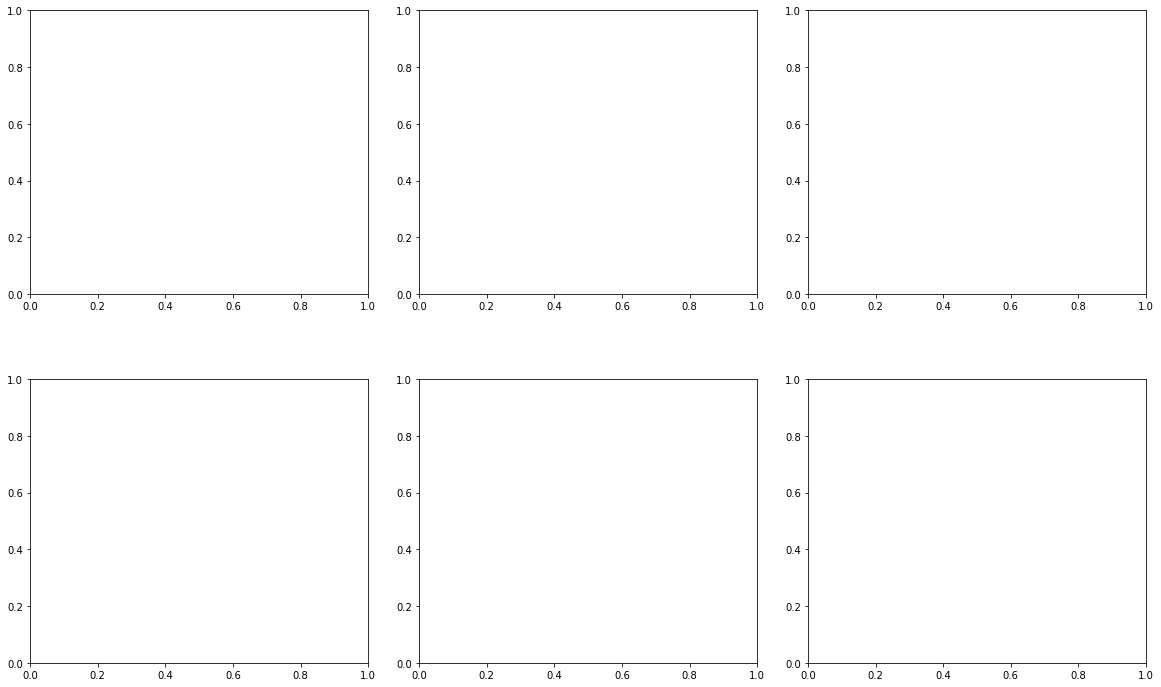

In [ ]:
# Bar plot instead with line being variance across multiple prompts (except for 8b just put no bar)
# group 1 of bars: epochs; group 2 of bars: shots; group 3 of bars: model params

### x-axis: params ; y-axis: loss / perf ; std: seeds ; grouped by shots


import numpy as np
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8, 8))

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08


PREFIX_TO_EPOCHS = {
    "8b7178b25b": 7,
    "8b7178b35b": 5,
    "8b7178b44b": 4,
    "8b7178b58b": 3,
    "8b7178b88b": 2,
    "8b7178b178b": 1,

    "4b284b12b": 7,
    "4b284b17b": 5,
    "4b284b21b": 4,
    "4b284b28b": 3,
    "4b284b42b": 2,
    "4b284b84b": 1,

    "2b855b1b25": 44,
    "2b855b4b": 14,
    "2b855b9b": 7,
    "2b855b11b": 5,
    "2b855b14b": 4,
    "2b855b18b": 3,
    "2b855b28b": 2,
    "2b855b55b": 1,
}

EPOCHS_TO_COLOR = {
    44: "#03071E",
    14: "#6A040F",
    7: "#D00000",
    5: "#DC2F02",
    4: "#E85D04",
    3: "#F48C06",
    2: "#FAA307",
    1: "#FFBA08",
}

COLORS = list(reversed([
#    '#03071E',
    '#6A040F',
    '#D00000',
    '#E85D04',
    '#FB8500',
    "#FAA307",
    '#FFBA08',
]))

FONTSIZE = 16

fig, axes = plt.subplots(figsize=(20, 12), facecolor='w', nrows=2, ncols=3, edgecolor='k', sharey=False)
axes = axes.flatten()
plt.subplots_adjust(wspace=0.15, hspace=0.3)

GROUPS = [
    (0, "lm1-2b8-55b-c4-repetitions"),
    (3, "lm1-2b8-55b-oscar-repetitions"),

    (1, "lm1-4b2-84b-c4-repetitions"),
    (4, "lm1-4b2-84b-oscar-repetitions"),

    (2, "lm1-8b7-178b-c4-repetitions"),
    (5, "lm1-8b7-178b-oscar-repetitions"),
]

IDX_TO_TILE = {
    0: "(a) 2.8B parameters trained on C4",
    1: "(b) 4.2B parameters trained on C4",
    2: "(c) 8.6B parameters trained on C4",
    3: "(d) 2.8B parameters trained on OSCAR",
    4: "(e) 4.2B parameters trained on OSCAR",
    5: "(f) 8.6B parameters trained on OSCAR",       
}

for i, base_model in GROUPS:
    
    last_len = 0


    epochs = list(reversed([
        PREFIX_TO_EPOCHS[prefix.replace("oscar", "").replace("c4", "")] for prefix in MODEL_TO_FEWSHOT_SCORES[base_model]
    ]))
    colors = [EPOCHS_TO_COLOR[epoch] for epoch in epochs]
    for shots in list(range(0, 6)):
        scores_group = [v[shots] for k, v in reversed(MODEL_TO_FEWSHOT_SCORES[base_model].items())]

        bar = axes[i].bar(
            list(range(last_len + shots, last_len + shots + len(scores_group))),
            scores_group,
            #yerr=scores_std,
            #color=COLORS[:len(scores_group)],
            color=colors,
        )
        last_len += len(scores_group) + 1

    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)
    if i > 2: 
        axes[i].set_xlabel("Fewshots", fontsize=FONTSIZE)
    if i == 0:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)
        axes[i].legend(
            [x for x in bar], 
            [str(x) for x in epochs], 
            title="Epochs", 
            fontsize=FONTSIZE,
            frameon=False,
            ncol=4,
            title_fontproperties={'weight': 'bold', "size": FONTSIZE},
            columnspacing=0.9,
            loc="upper center"
        )
        #list(range(0, 6)), ontsize=FONTSIZE)
        #[x for x in bar], list(range(0, 6)), title="Epochs", fontsize=FONTSIZE, ncol=6, loc="upper center", frameon=False)
    if i == 3:
        axes[i].set_ylabel("Normalized Average (%)", fontsize=FONTSIZE)

    axes[i].set_ylim((10, 35))

    axes[i].set_xticks(
        [len(scores_group) // 2 + (j * (len(scores_group) + 2)) for j in range(6)], list(range(6))
    )

    axes[i].grid(axis='y')
    axes[i].set_axisbelow(True)

    #legend = axes[i].legend([x for x in bar], list(range(0, 6)), title="Epochs", fontsize=FONTSIZE, ncol=6, loc="upper center", frameon=False)

    # https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend
    #plt.setp(legend.get_title(), fontsize=FONTSIZE, fontweight="bold")

    #handles, labels = ax.get_legend_handles_labels()
    # Add box to legend; https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes
    #handles = handles[:1] + bp["boxes"]
    #labels = [str(labels[0])] + ["Performance"] # + OPS
    #ax.legend(handles, labels, prop={'size': 16}, title_fontproperties={'weight':'bold'})
    #plt.setp(plt.gca().get_legend().get_texts(), fontsize='16')

    axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE, fontweight="bold", pad=30)


plt.savefig(f"epochs_scores.pdf", bbox_inches="tight")
plt.show()


In [ ]:
epoch_to_models = {}
colors = []
for model in MODEL_TO_FEWSHOT_SCORES[base_model]:
    prefix = model.replace("oscar","").replace("c4", "").replace("seed1","").replace("seed2","").replace("seed3","").replace("seed4", "")
    epoch_to_models.setdefault(PREFIX_TO_EPOCHS[prefix], [])
    epoch_to_models[PREFIX_TO_EPOCHS[prefix]].append(model)
    colors.append(EPOCHS_TO_COLOR[PREFIX_TO_EPOCHS[prefix]])

for shots in list(range(0, 6)):
    scores_group = []
    scores_std_group = []
    for epoch in epoch_to_models:
        scores = [MODEL_TO_FEWSHOT_SCORES[base_model][model][shots] for model in epoch_to_models[epoch]]
        
        scores_mean = np.mean(scores)
        scores_std = np.std(scores)

        scores_group.append(scores_mean)
        scores_std_group.append(scores_std)


In [ ]:
epoch_to_models

{44: ['2b855b1b25c4',
  '2b855b1b25c4seed1',
  '2b855b1b25c4seed2',
  '2b855b1b25c4seed3',
  '2b855b1b25c4seed4'],
 14: ['2b855b4bc4',
  '2b855b4bc4seed1',
  '2b855b4bc4seed2',
  '2b855b4bc4seed3',
  '2b855b4bc4seed4'],
 7: ['2b855b9bc4',
  '2b855b9bc4seed1',
  '2b855b9bc4seed2',
  '2b855b9bc4seed3',
  '2b855b9bc4seed4'],
 5: ['2b855b11bc4',
  '2b855b11bc4seed1',
  '2b855b11bc4seed2',
  '2b855b11bc4seed3',
  '2b855b11bc4seed4'],
 4: ['2b855b14bc4',
  '2b855b14bc4seed1',
  '2b855b14bc4seed2',
  '2b855b14bc4seed3',
  '2b855b14bc4seed4'],
 3: ['2b855b18bc4',
  '2b855b18bc4seed1',
  '2b855b18bc4seed2',
  '2b855b18bc4seed3',
  '2b855b18bc4seed4'],
 2: ['2b855b28bc4',
  '2b855b28bc4seed1',
  '2b855b28bc4seed2',
  '2b855b28bc4seed3',
  '2b855b28bc4seed4'],
 1: ['2b855b55bc4',
  '2b855b55bc4seed1',
  '2b855b55bc4seed2',
  '2b855b55bc4seed3',
  '2b855b55bc4seed4']}

In [ ]:
for shots in list(range(0, 6)):
    scores_group = []
    scores_std_group = []
    for epoch in epoch_to_models:
        scores = [MODEL_TO_FEWSHOT_SCORES[base_model][model][shots] for model in epoch_to_models[epoch]]
        
        scores_mean = np.mean(scores)
        scores_std = np.std(scores)

        scores_group.append(scores_mean)
        scores_std_group.append(scores_std)



In [ ]:

last_len = 0
epochs = list(reversed([
    PREFIX_TO_EPOCHS[prefix.replace("oscar", "").replace("c4", "")] for prefix in MODEL_TO_FEWSHOT_SCORES[base_model]
]))
colors = [EPOCHS_TO_COLOR[epoch] for epoch in epochs]
for shots in list(range(0, 6)):
    scores_group = [v[shots] for k, v in reversed(MODEL_TO_FEWSHOT_SCORES[base_model].items())]

    bar = axes[i].bar(

In [ ]:
epoch_to_models, prefix_to_color

({44: ['2b855b1b25c4',
   '2b855b1b25c4seed1',
   '2b855b1b25c4seed2',
   '2b855b1b25c4seed3',
   '2b855b1b25c4seed4'],
  14: ['2b855b4bc4',
   '2b855b4bc4seed1',
   '2b855b4bc4seed2',
   '2b855b4bc4seed3',
   '2b855b4bc4seed4'],
  7: ['2b855b9bc4',
   '2b855b9bc4seed1',
   '2b855b9bc4seed2',
   '2b855b9bc4seed3',
   '2b855b9bc4seed4'],
  5: ['2b855b11bc4',
   '2b855b11bc4seed1',
   '2b855b11bc4seed2',
   '2b855b11bc4seed3',
   '2b855b11bc4seed4'],
  4: ['2b855b14bc4',
   '2b855b14bc4seed1',
   '2b855b14bc4seed2',
   '2b855b14bc4seed3',
   '2b855b14bc4seed4'],
  3: ['2b855b18bc4',
   '2b855b18bc4seed1',
   '2b855b18bc4seed2',
   '2b855b18bc4seed3',
   '2b855b18bc4seed4'],
  2: ['2b855b28bc4',
   '2b855b28bc4seed1',
   '2b855b28bc4seed2',
   '2b855b28bc4seed3',
   '2b855b28bc4seed4'],
  1: ['2b855b55bc4',
   '2b855b55bc4seed1',
   '2b855b55bc4seed2',
   '2b855b55bc4seed3',
   '2b855b55bc4seed4']},
 {'2b855b1b25': '#03071E',
  '2b855b4b': '#6A040F',
  '2b855b9b': '#D00000',
  '2b855b11b'

In [ ]:
prefix_to_color

{'2b855b1b25': '#03071E',
 '2b855b4b': '#6A040F',
 '2b855b9b': '#D00000',
 '2b855b11b': '#DC2F02',
 '2b855b14b': '#E85D04',
 '2b855b18b': '#F48C06',
 '2b855b28b': '#FAA307',
 '2b855b55b': '#FFBA08'}

In [ ]:
epochs

[44,
 14,
 7,
 5,
 4,
 3,
 2,
 1,
 44,
 44,
 44,
 44,
 14,
 14,
 14,
 14,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1]

##### Multiple prompts

In [ ]:
### Get Downstream evaluation of reproduced Scores ###

import glob

import pandas as pd

TASK_TO_BASELINE = {
    "anli_r1": 1/3,
    "anli_r2": 1/3,
    "anli_r3": 1/3,
    "arc_challenge": 1/4,
    "arc_easy": 1/4,
    "boolq": 1/2,
    "cb": 1/3,
    "copa": 1/2,
    "hellaswag": 1/4,
    "piqa": 1/2,
    "rte": 1/2,
    "sciq": 1/4,
    "story_cloze_2016": 1/4,
    "winogrande": 1/2,
}

REPS_TO_MODELS = {
  "lm1-4b2-84b-c4-repetitions": {
      7: "4b284b12bc4",
	    5: "4b284b17bc4",
      4: "4b284b21bc4",
      3: "4b284b28bc4",
      2: "4b284b42bc4",
      1: "4b284b84bc4",
  }
}

OPS_TO_SCORES = {}
OPS_TO_FULL_SCORES = {}

OPS_TO_FEWSHOT_SCORES = {}
OPS_TO_FEWSHOT_SCORES_BEST_PROMPT = {}
OPS_TO_PROMPT_SCORES = {}
OPS_TO_DATASET_SCORES = {}

for BASE_MODEL, DATA in REPS_TO_MODELS.items():
    !GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/{BASE_MODEL}
    !cd {BASE_MODEL}; git pull
    for REP, MODEL in DATA.items():
        eval = pd.read_csv(f"{BASE_MODEL}/{MODEL}/eval/merged.csv")
        # Columns: "dataset", "fewshots", "prompt", "metric", "value"
        eval["normalized"] = eval.apply(lambda x: (x["value"] - TASK_TO_BASELINE.get(x["dataset"], 0)) / (1 - TASK_TO_BASELINE.get(x["dataset"], 0)), axis=1)
        
        ### STD = PROMPTS ; AVG = ACROSS SHOTS & DATASET FOR SAME RANKED PROMPTS ###
        # Varies from ~0 to 0.13
        # Each dataset has 5 prompts; Assign an identifier to each prompt, such that
        # the best prompt is 0, the 2nd best prompt is 1, etc. for every dataset        
        eval_prompts = eval[eval["prompt"] != "median"]
        eval_prompts = eval_prompts[eval["prompt"] != "average"]

        eval_prompts["prompt_id"] = eval_prompts.groupby(["dataset", "fewshots"])["normalized"].rank(method="first", ascending=False).astype(int)
        eval_prompts = eval_prompts.groupby(["prompt_id"]).mean().reset_index()
        OPS_TO_PROMPT_SCORES.setdefault(BASE_MODEL, {})
        OPS_TO_PROMPT_SCORES[BASE_MODEL][MODEL] = eval_prompts.normalized.values.tolist()

        ### STD = SHOTS ; MEDIAN ACROSS PROMPTS & AVG ACROSS DATASET ###
        # Varies from ~0.08 - 0.12

        fewshots = eval[eval["prompt"] == "median"].groupby(["fewshots"]).mean().reset_index()

        OPS_TO_FEWSHOT_SCORES.setdefault(BASE_MODEL, {})
        OPS_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL] = fewshots.normalized.values.tolist()

        ### STD = SHOTS ; MAX ACROSS PROMPTS & AVG ACROSS DATASET ###
        fewshots_max = eval[eval["prompt"] != "median"]
        fewshots_max = fewshots_max[eval["prompt"] != "average"]
        fewshots_max["prompt_id"] = fewshots_max.groupby(["dataset", "fewshots"])["normalized"].rank(method="first", ascending=False).astype(int)
        fewshots_max = fewshots_max[fewshots_max["prompt_id"] == 1].groupby(["fewshots"]).mean().reset_index()

        OPS_TO_FEWSHOT_SCORES_BEST_PROMPT.setdefault(BASE_MODEL, {})
        OPS_TO_FEWSHOT_SCORES_BEST_PROMPT[BASE_MODEL][MODEL] = fewshots.normalized.values.tolist()      


        ### STD = DATASET ; MEDIAN ACROSS PROMPTS & AVG ACROSS SHOTS ###
        # Varies easily from 0 to 0.5

        fewshots = eval[eval["prompt"] == "median"].groupby(["dataset"]).mean().reset_index()

        OPS_TO_DATASET_SCORES.setdefault(BASE_MODEL, {})
        OPS_TO_DATASET_SCORES[BASE_MODEL][MODEL] = fewshots.normalized.values.tolist()

        
        

fatal: destination path 'lm1-4b2-84b-c4-repetitions' already exists and is not an empty directory.
Already up to date.


<ipython-input-7-0eac8c9b1596>:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eval_prompts = eval_prompts[eval["prompt"] != "average"]
<ipython-input-7-0eac8c9b1596>:73: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fewshots_max = fewshots_max[eval["prompt"] != "average"]


In [ ]:
OPS_TO_FEWSHOT_SCORES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
COLOR_MAP = {
    7: '#03071E',
    5: '#6A040F',
    4: '#D00000',
    3: '#E85D04',
    2: '#FB8500',
    1: '#FFBA08',
}

LOSSES = [
  2.525268077850342,
  2.483349323272705,
  2.4695968627929688,
  2.4654414653778076,
  2.468310832977295,
  2.4483046531677246
]

EPOCHS = [7, 5, 4, 3, 2, 1]

PARAMS_TICKS = [100e6, 300e6, 1e9, 3e9, 6e9, 30e9]
PARAMS_STR = ["100M", "300M", "1B", "3B", "6B", "30B"]


LOSS_MIN = 1.8
LOSS_MAX = 2.9

SHOTS = [0, 1, 2, 3, 4, 5]


fig, ax = plt.subplots(figsize=(8, 8))#, nrows=2, ncols=2)


ax.plot(EPOCHS, LOSSES, 'x', markersize=10, mew=4, color="#9D0208", label="Loss")
ax2 = ax.twinx()
ax2.boxplot(OPS_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'].values(), positions=list(reversed(EPOCHS)))

ax.set_xlabel("Epochs", fontsize=12)
ax.set_ylabel("Validation loss", fontsize=12)
ax2.set_ylabel("Rescaled performance", fontsize=12)

ax.set_xticks(list(reversed(EPOCHS)), fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)


ax.grid(axis='y')

ax.legend(fontsize=12)
plt.savefig("epochs_performance_multiple_prompts.pdf", bbox_inches="tight")
plt.show()
